Размер датасета: (1460, 81)

Пропущенные значения:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

Корреляция числовых признаков с целевой переменной (SalePrice):
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

Категориальные признаки:

MSZoning - уникальные значения:
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

Street - уникал

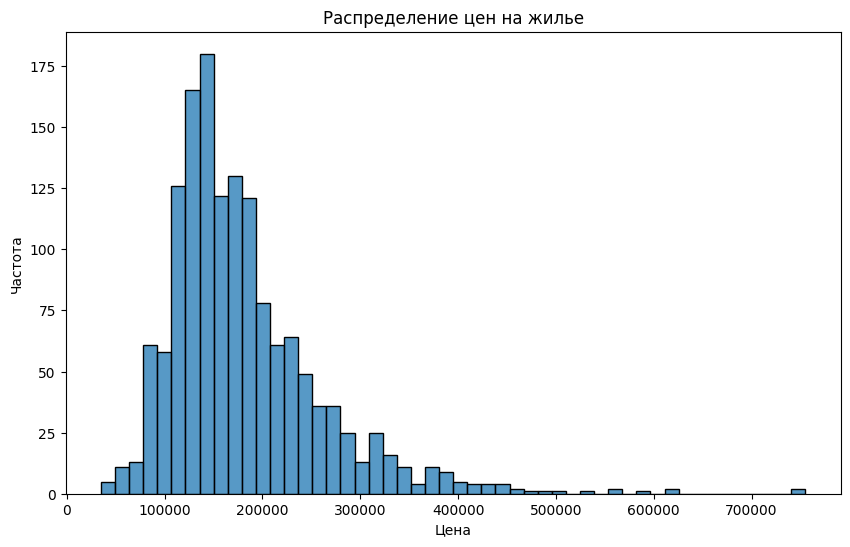

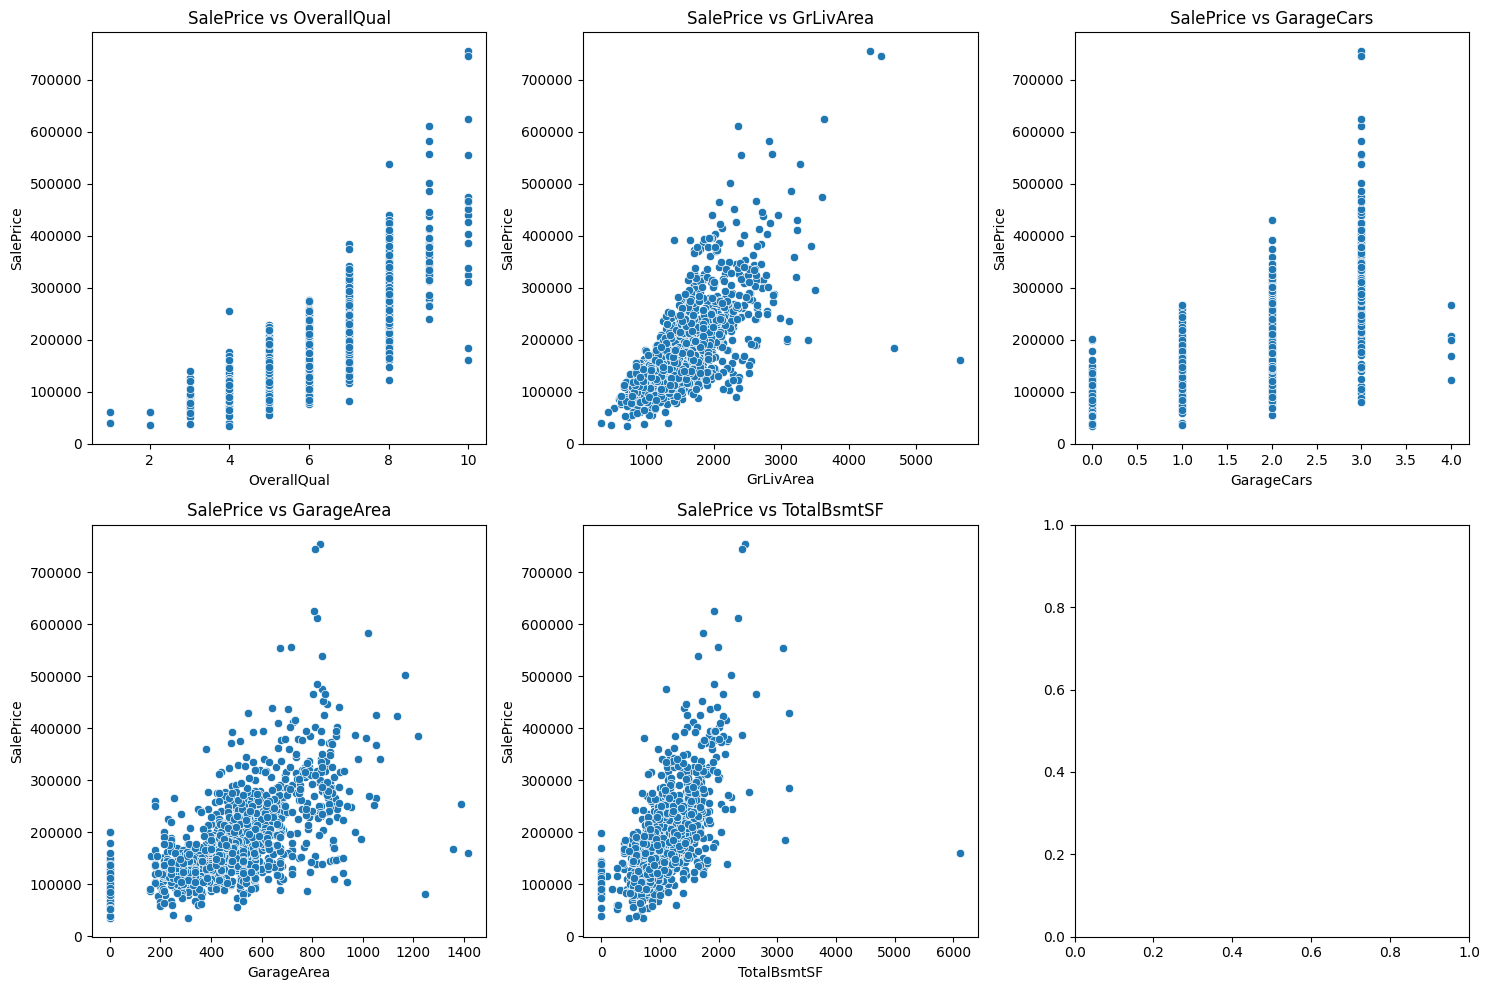

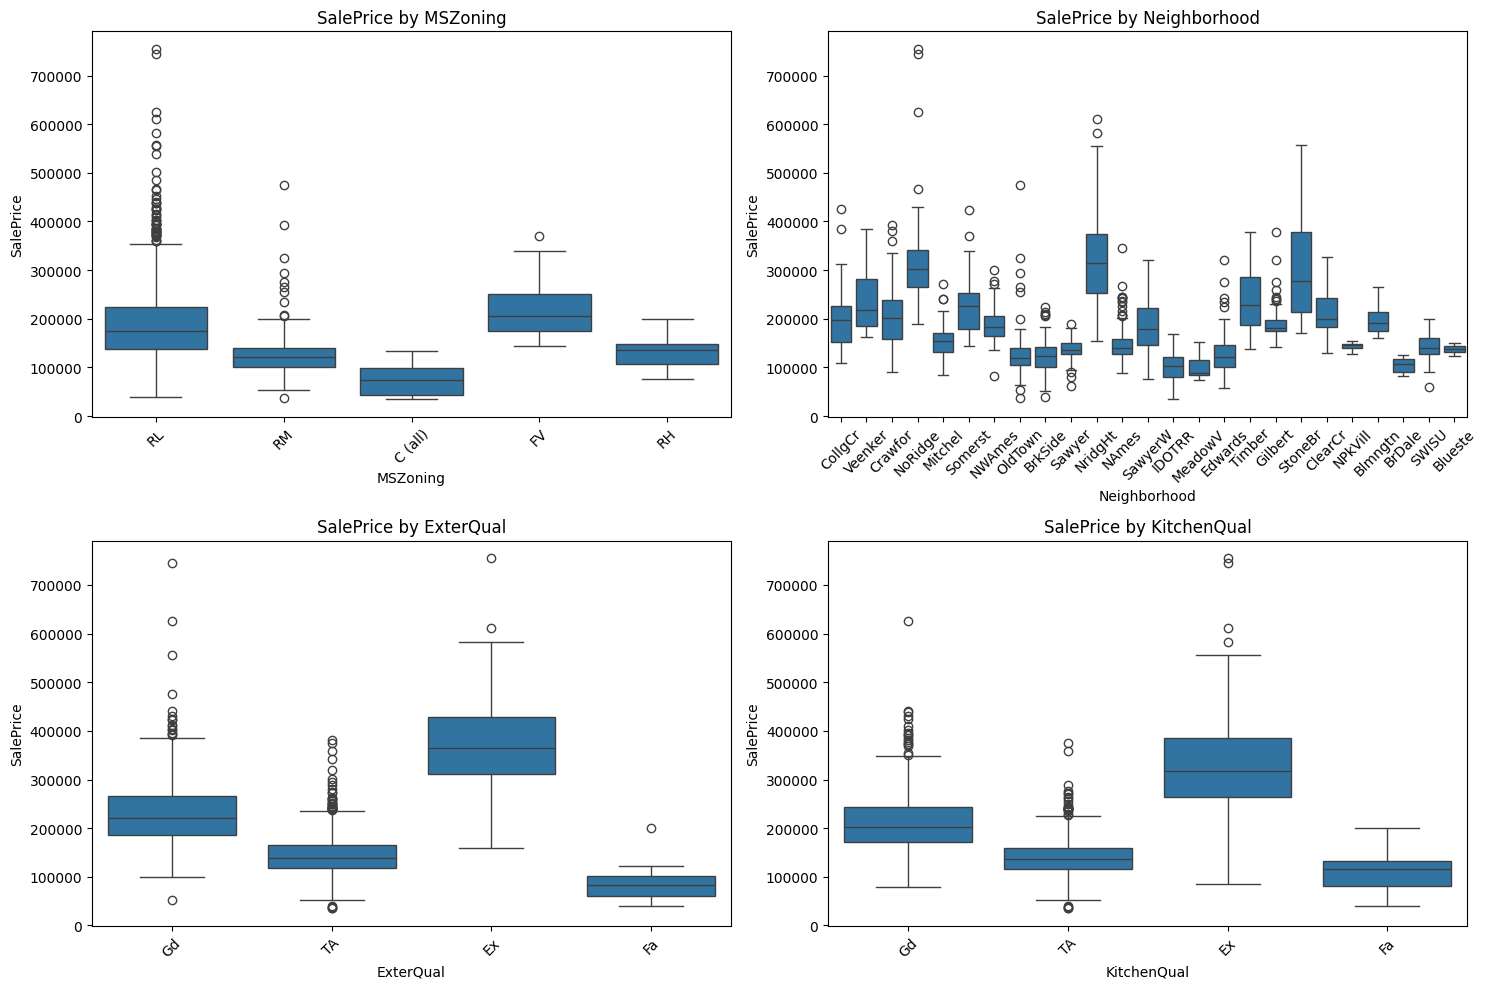


Статистические характеристики числовых признаков:
       OverallQual    GrLivArea   GarageCars   GarageArea  TotalBsmtSF
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000
mean      6.099315  1515.463699     1.767123   472.980137  1057.429452
std       1.382997   525.480383     0.747315   213.804841   438.705324
min       1.000000   334.000000     0.000000     0.000000     0.000000
25%       5.000000  1129.500000     1.000000   334.500000   795.750000
50%       6.000000  1464.000000     2.000000   480.000000   991.500000
75%       7.000000  1776.750000     2.000000   576.000000  1298.250000
max      10.000000  5642.000000     4.000000  1418.000000  6110.000000


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Базовый анализ данных
def analyze_dataset(df):
    print("Размер датасета:", df.shape)
    print("\nПропущенные значения:")
    missing_values = df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
    print(missing_values)
    
    # Корреляция только для числовых признаков
    numeric_df = df.select_dtypes(include=['int64', 'float64'])
    if 'SalePrice' in numeric_df.columns:
        print("\nКорреляция числовых признаков с целевой переменной (SalePrice):")
        correlations = numeric_df.corr()['SalePrice'].sort_values(ascending=False)
        print(correlations.head(10))
    
    return missing_values, numeric_df.columns

# Анализ категориальных признаков
def analyze_categorical(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    print("\nКатегориальные признаки:")
    for col in categorical_columns:
        print(f"\n{col} - уникальные значения:")
        print(df[col].value_counts().head())

# Анализ обучающего набора
missing_vals, numeric_cols = analyze_dataset(train_data)
analyze_categorical(train_data)

# Визуализация распределения целевой переменной
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], bins=50)
plt.title('Распределение цен на жилье')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

# Топ-5 важных числовых признаков
numeric_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, feat in enumerate(numeric_features):
    if feat in train_data.columns:  # Проверяем наличие признака
        sns.scatterplot(data=train_data, x=feat, y='SalePrice', ax=axes[idx])
        axes[idx].set_title(f'SalePrice vs {feat}')

plt.tight_layout()
plt.show()

# Анализ категориальных признаков с наибольшим влиянием на цену
categorical_features = ['MSZoning', 'Neighborhood', 'ExterQual', 'KitchenQual']
plt.figure(figsize=(15, 10))

for idx, feat in enumerate(categorical_features, 1):
    if feat in train_data.columns:  # Проверяем наличие признака
        plt.subplot(2, 2, idx)
        sns.boxplot(x=feat, y='SalePrice', data=train_data)
        plt.xticks(rotation=45)
        plt.title(f'SalePrice by {feat}')

plt.tight_layout()
plt.show()

# Вывод статистических характеристик числовых признаков
print("\nСтатистические характеристики числовых признаков:")
print(train_data[numeric_features].describe())

Размер датасета: (1460, 81)

Типы данных:
object     43
int64      35
float64     3
Name: count, dtype: int64


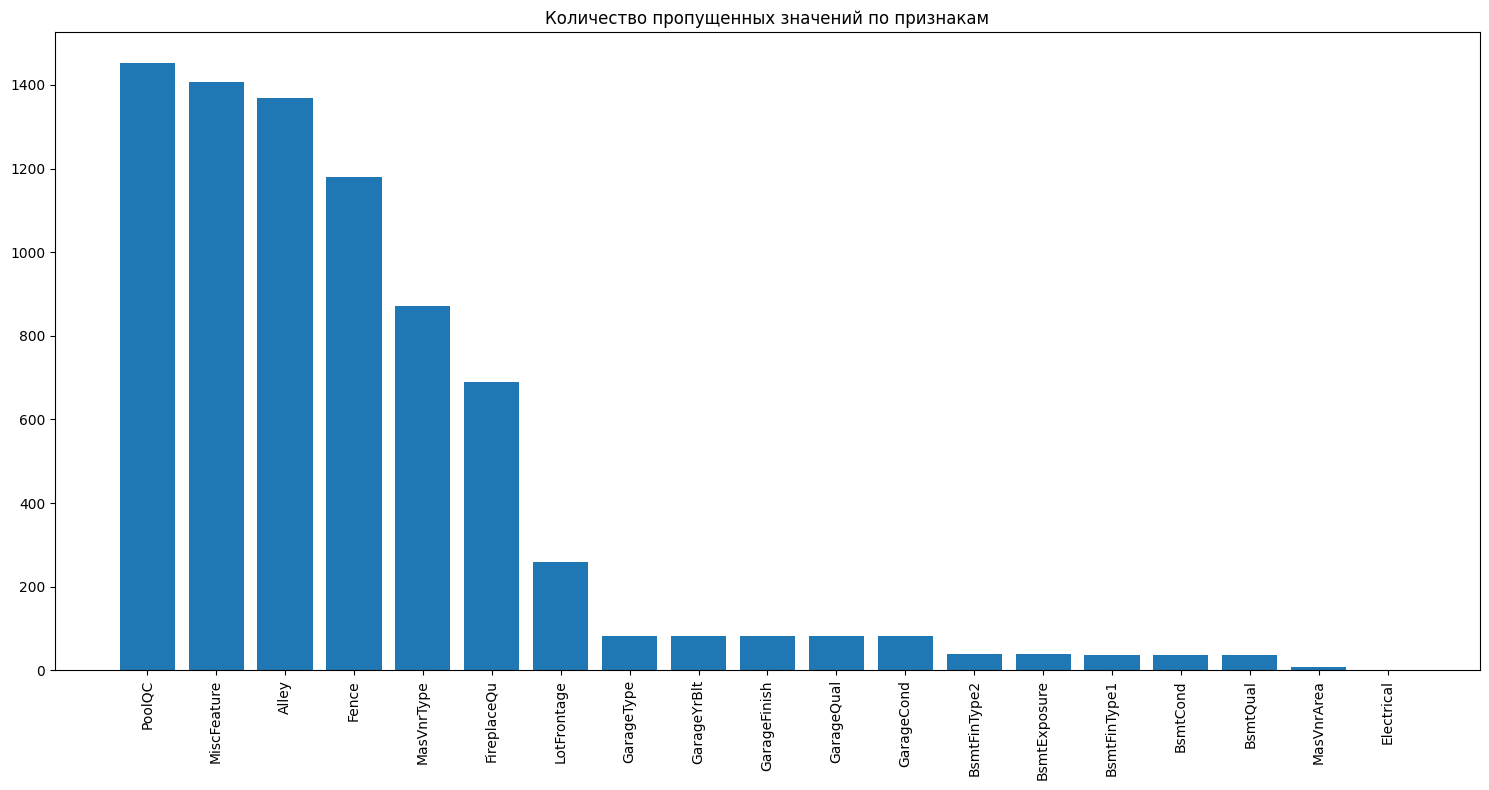

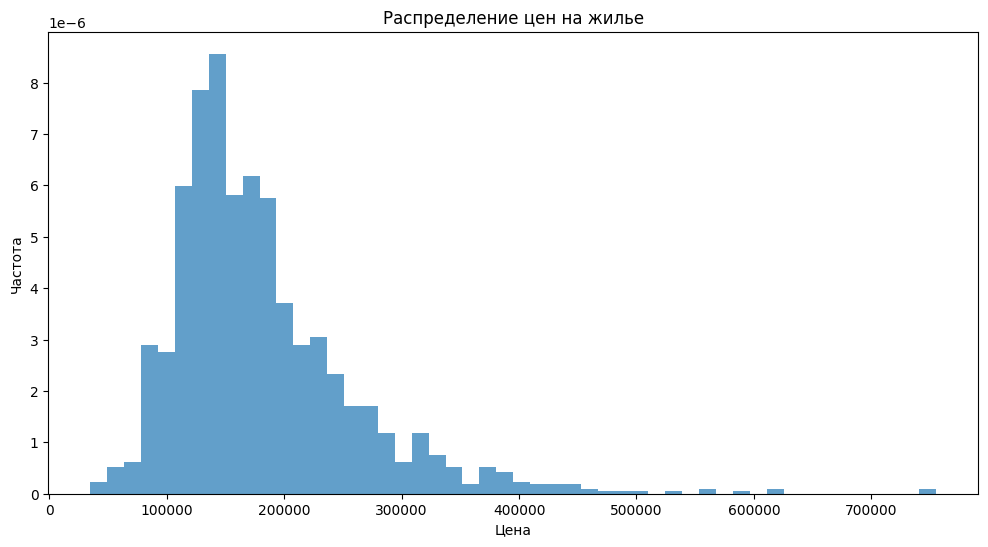

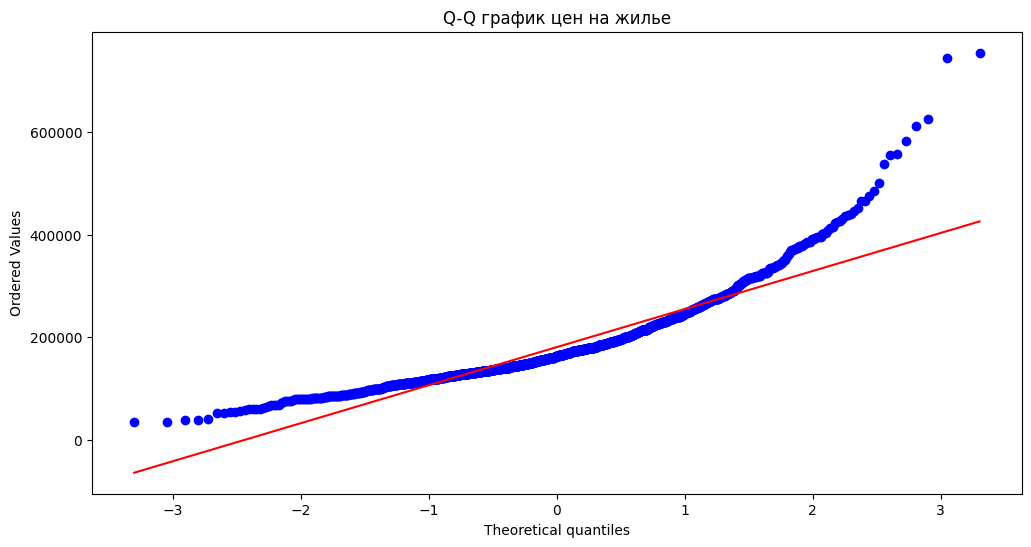

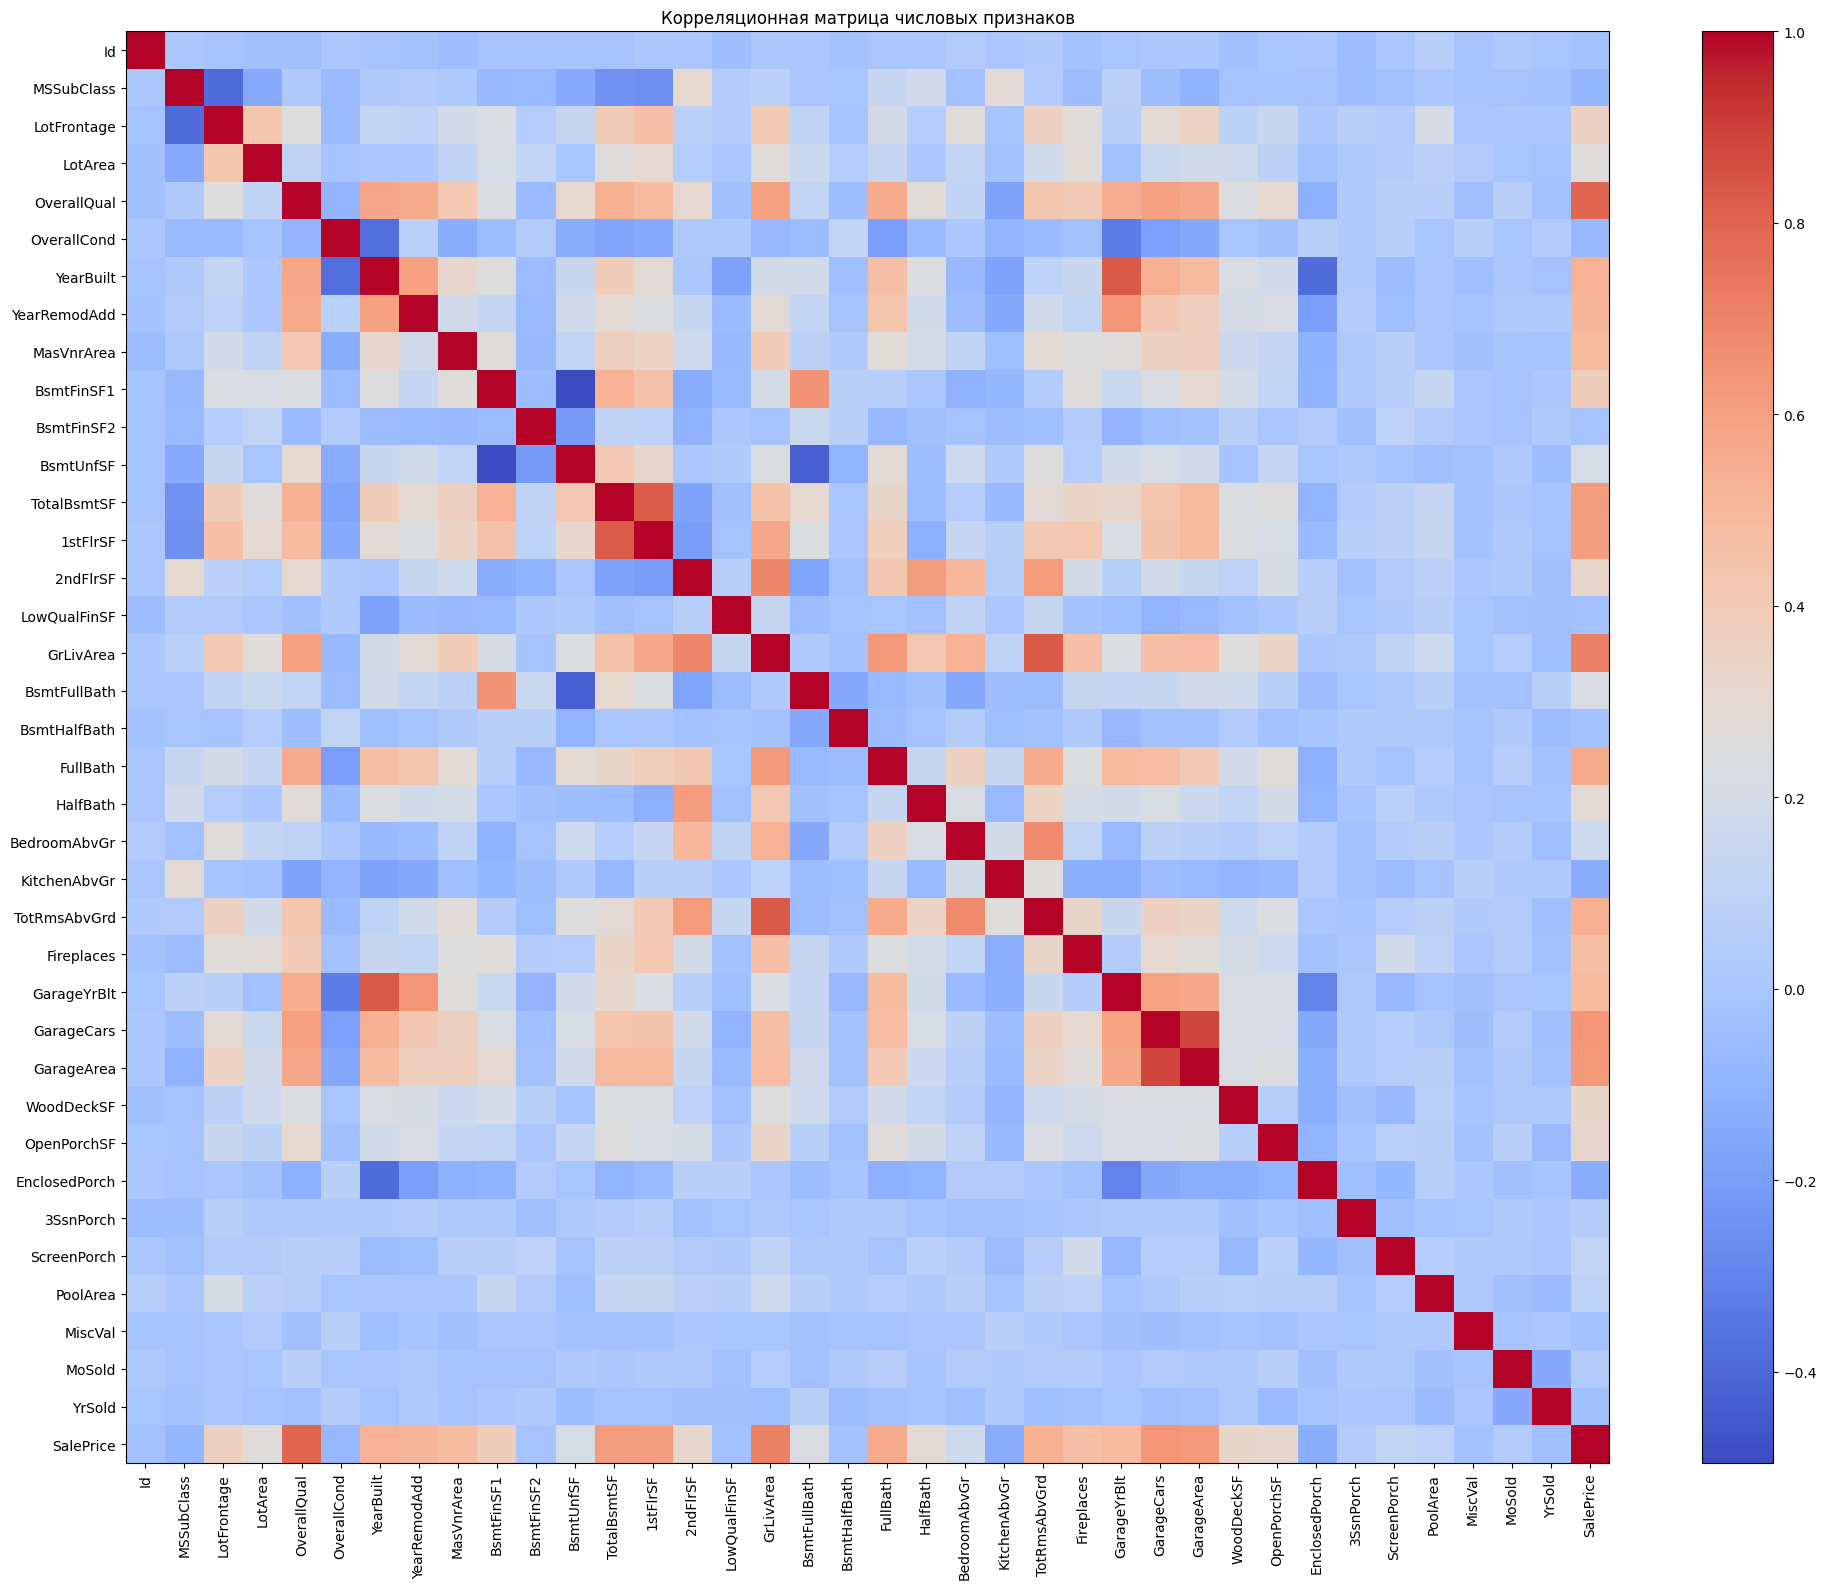

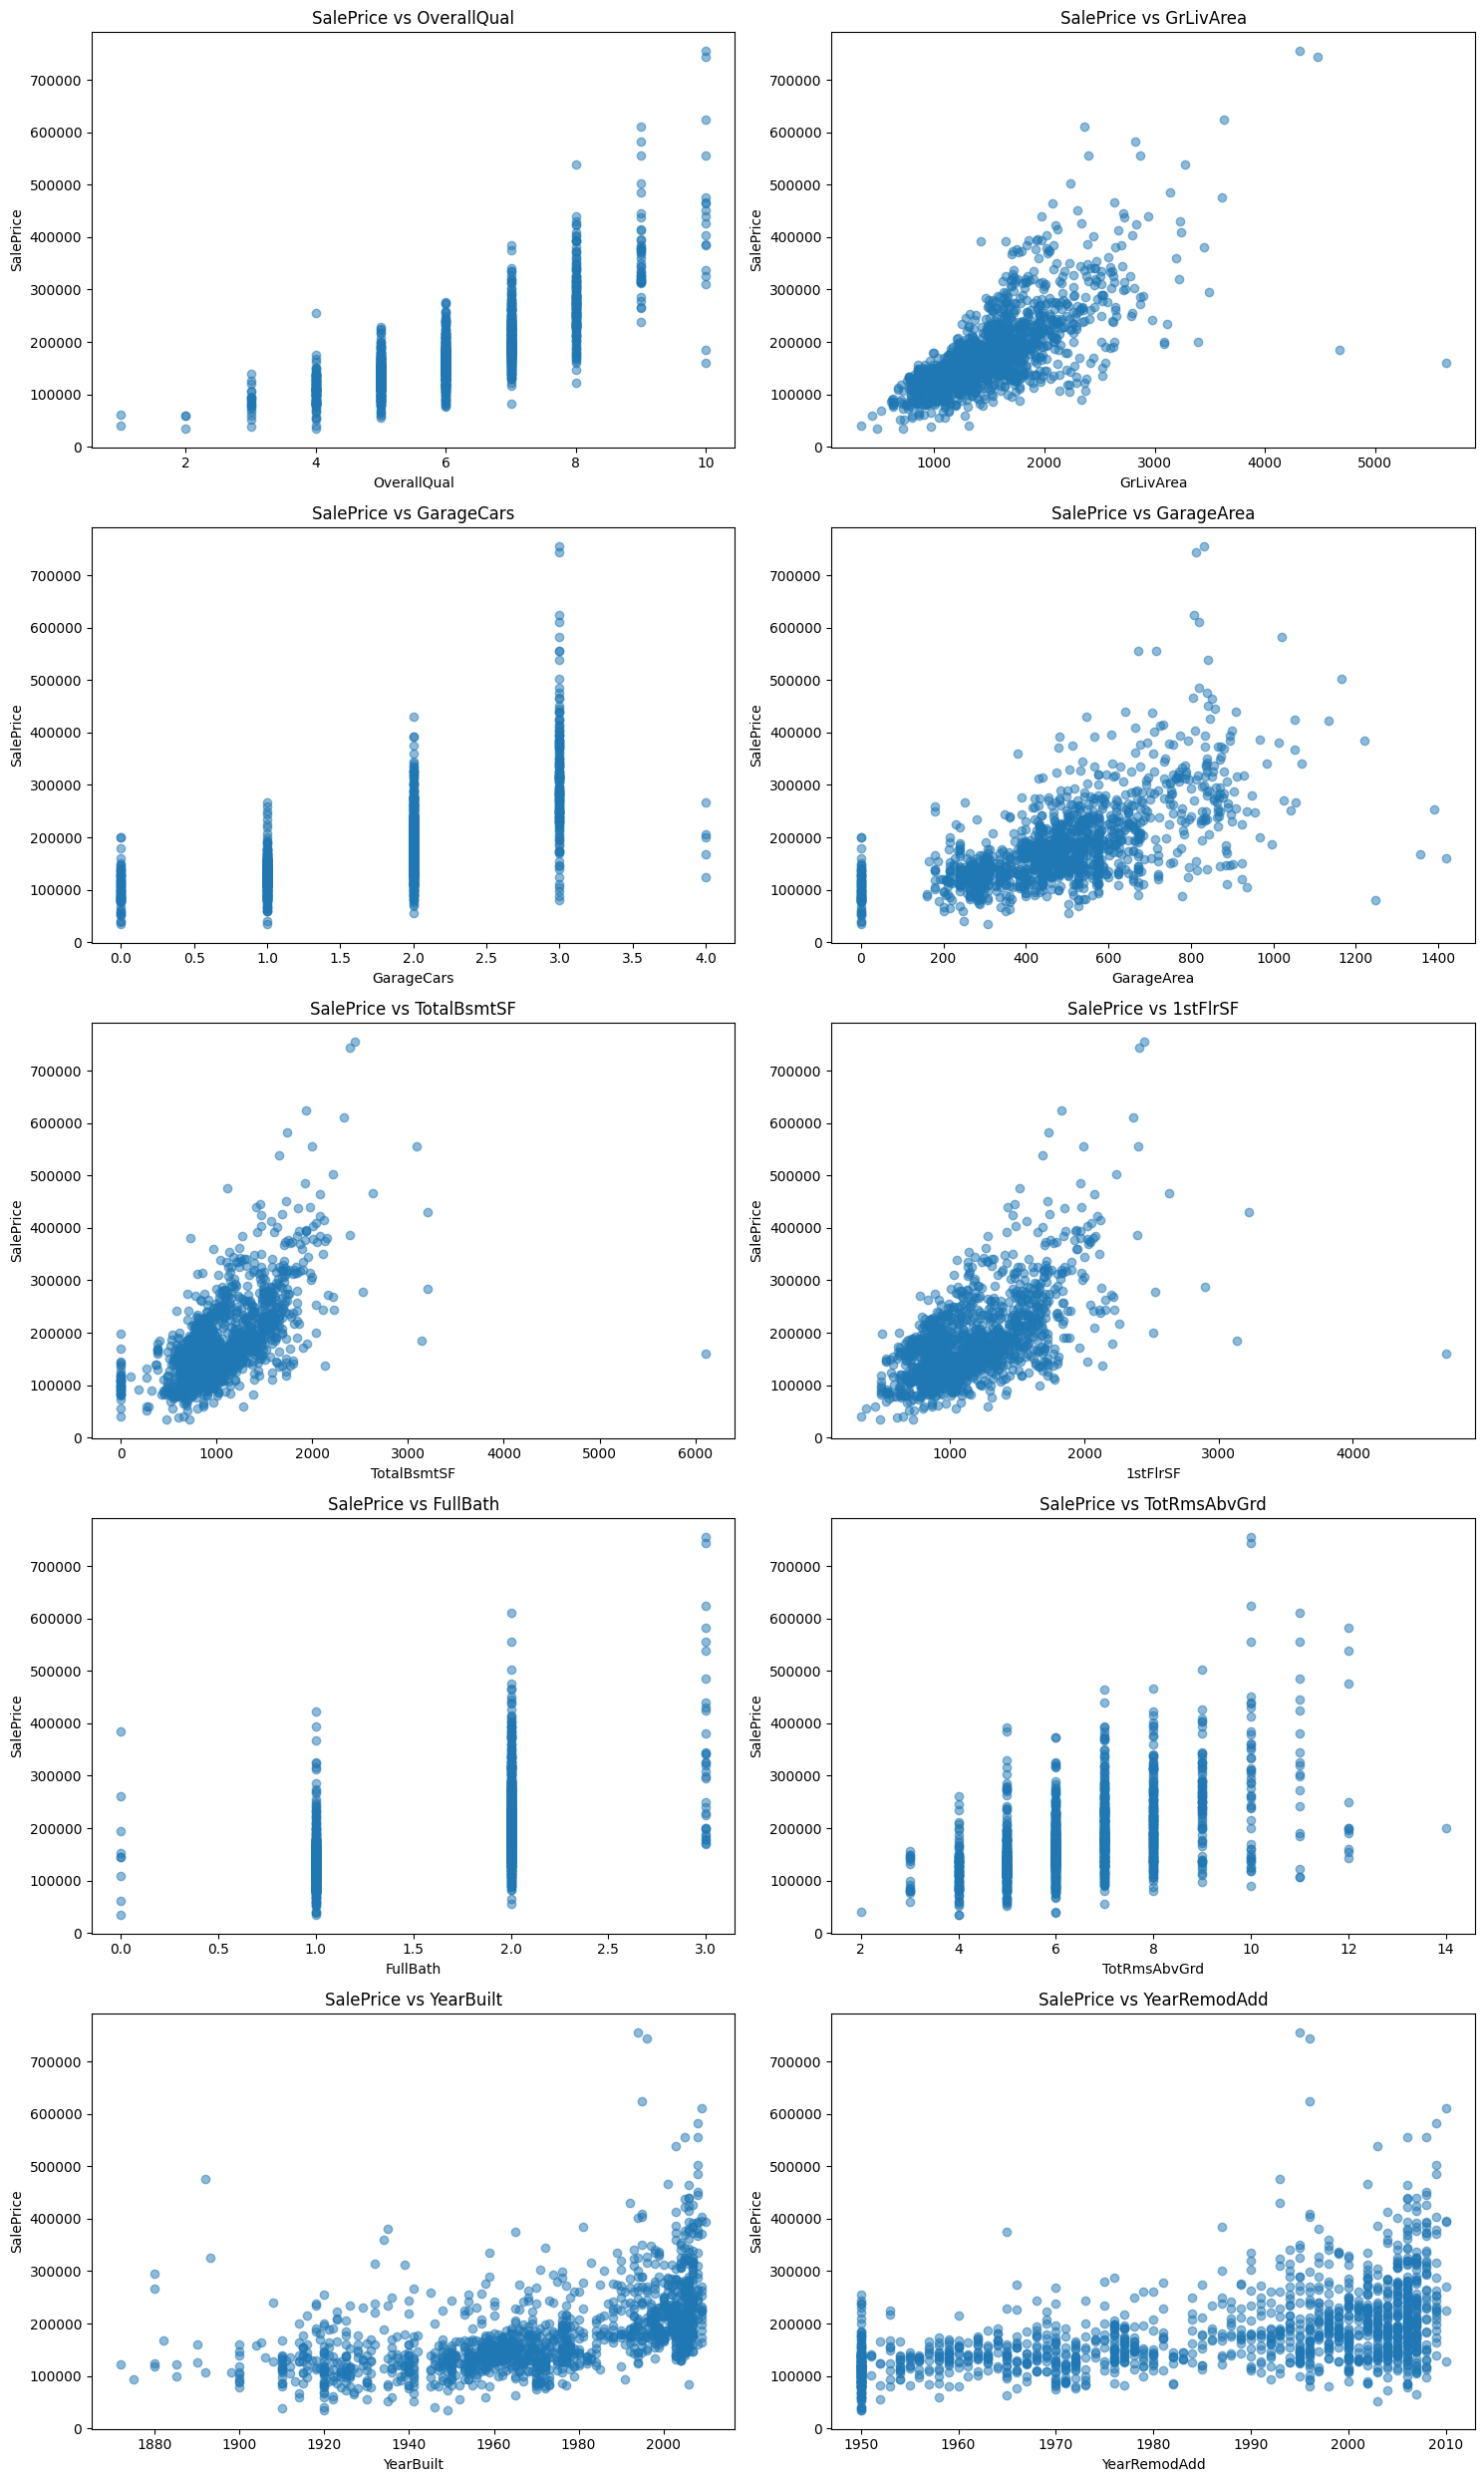

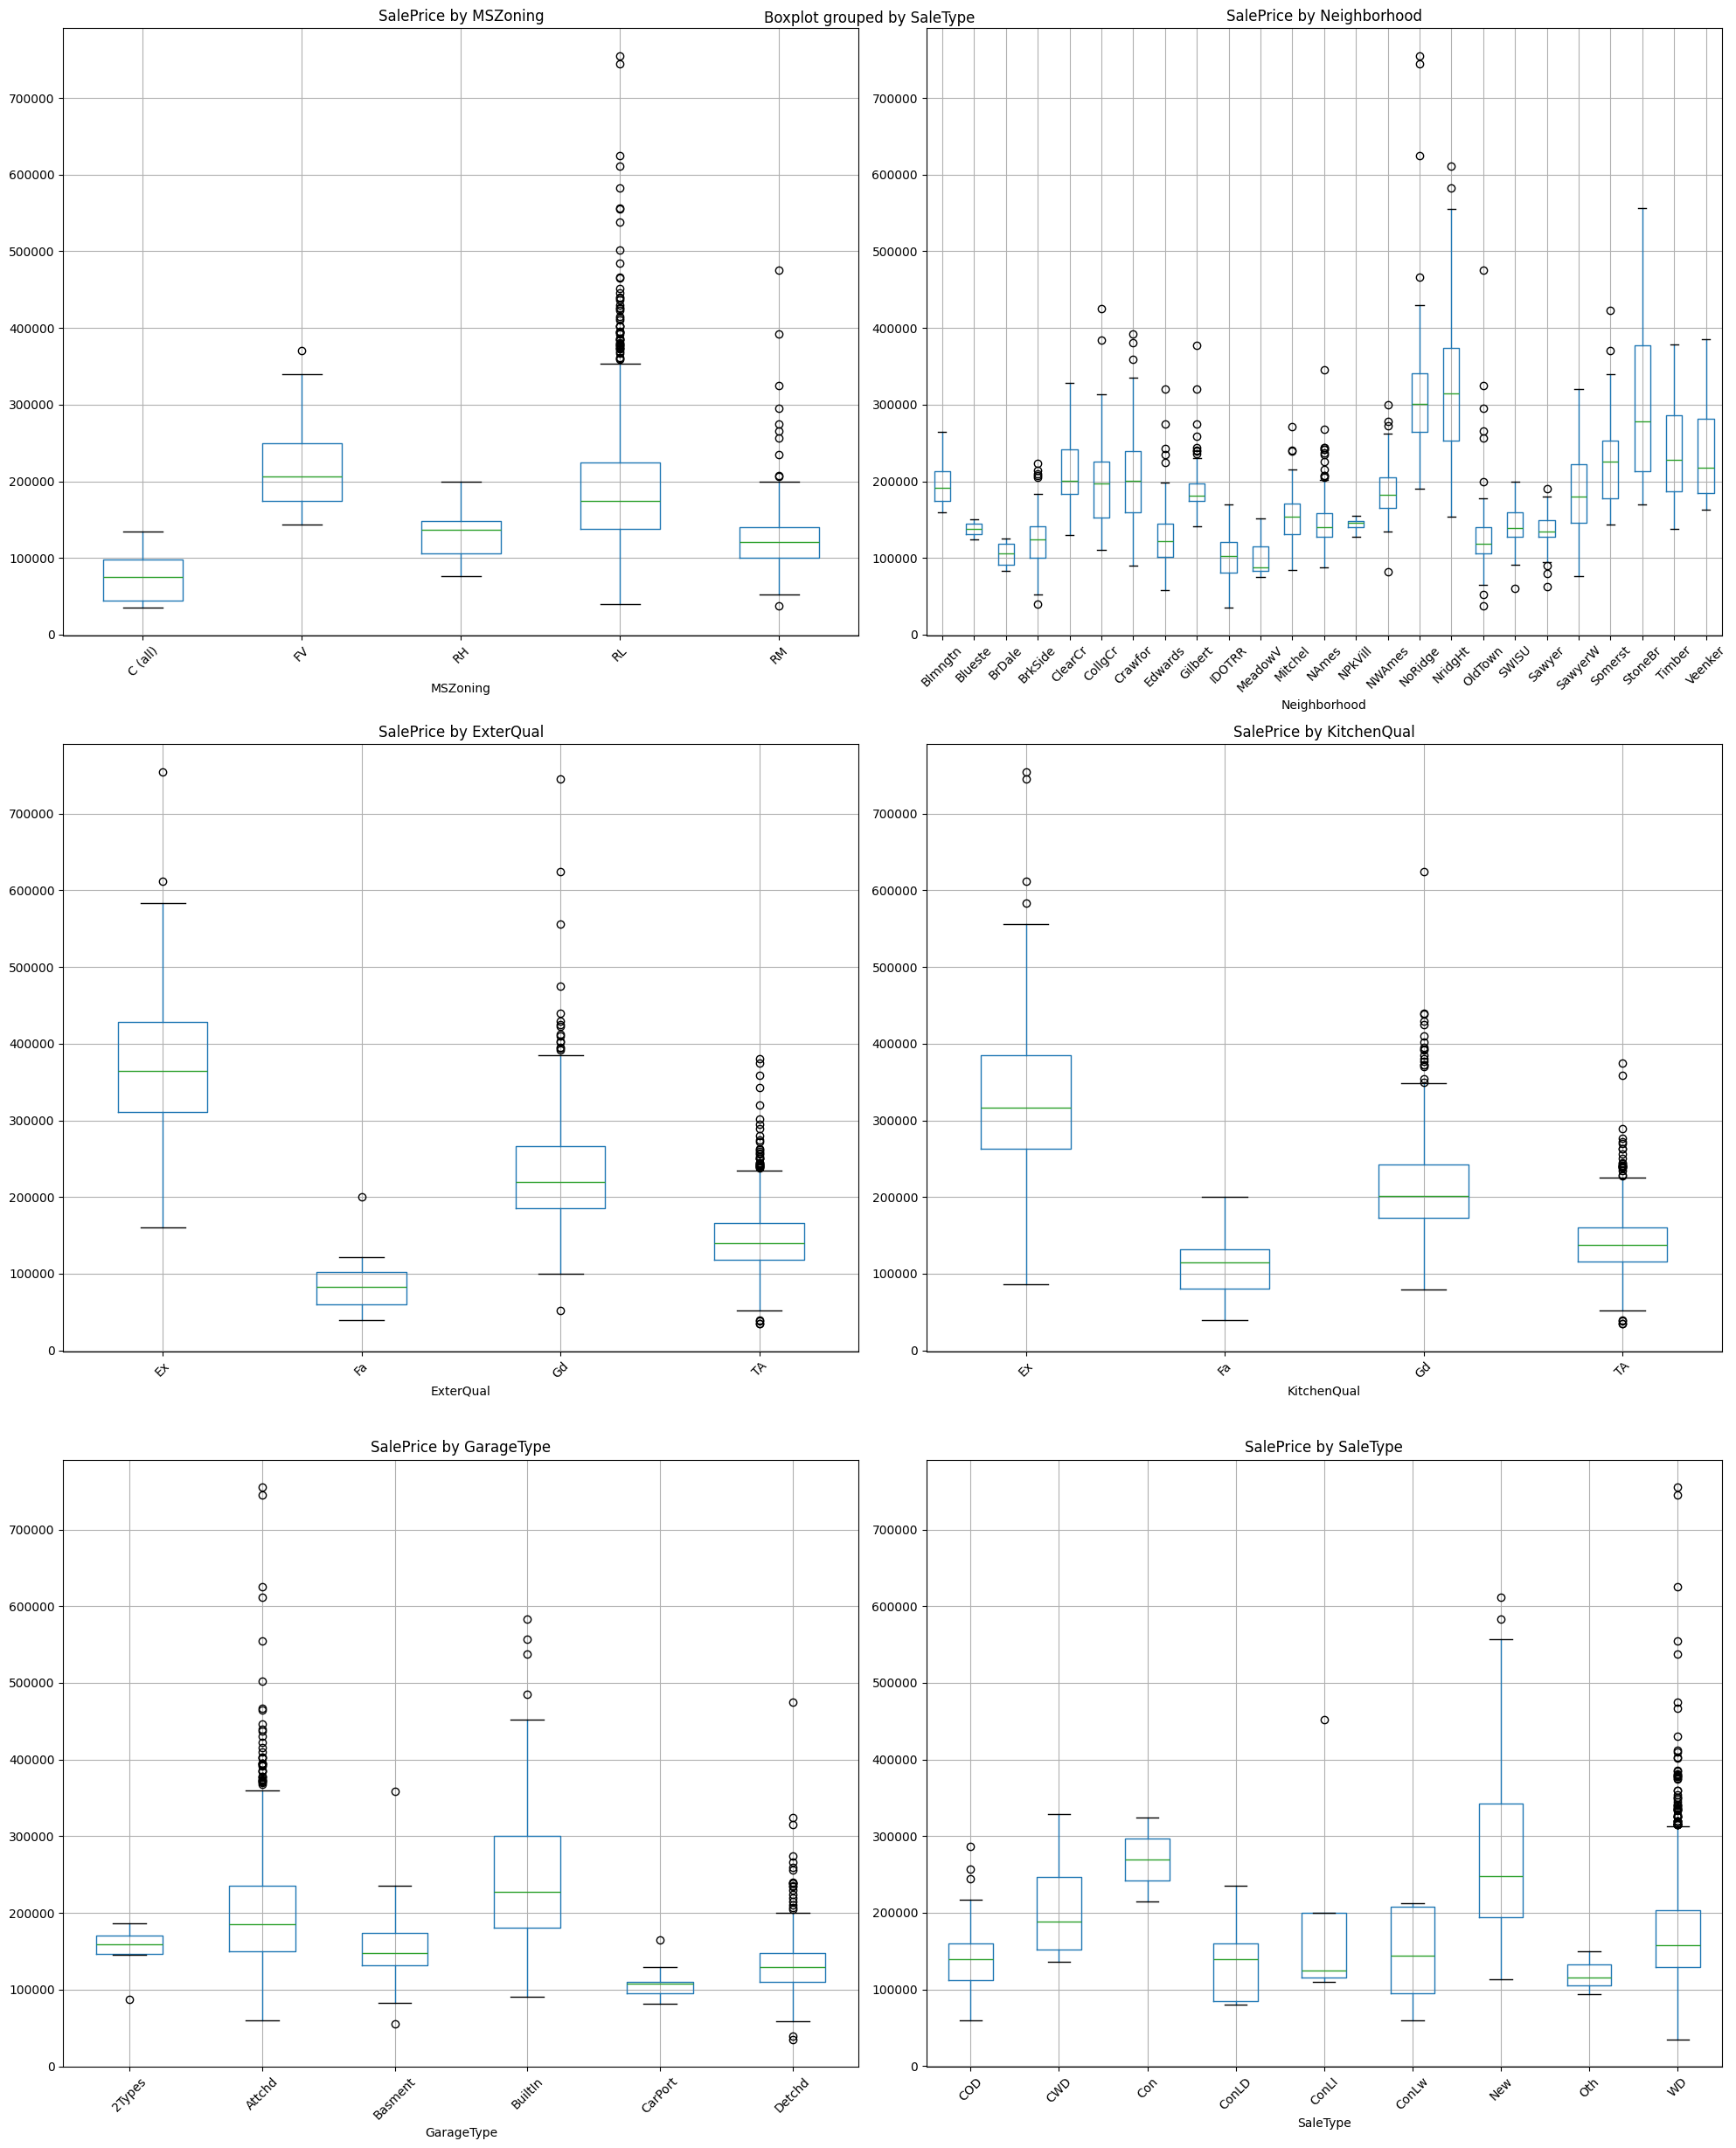

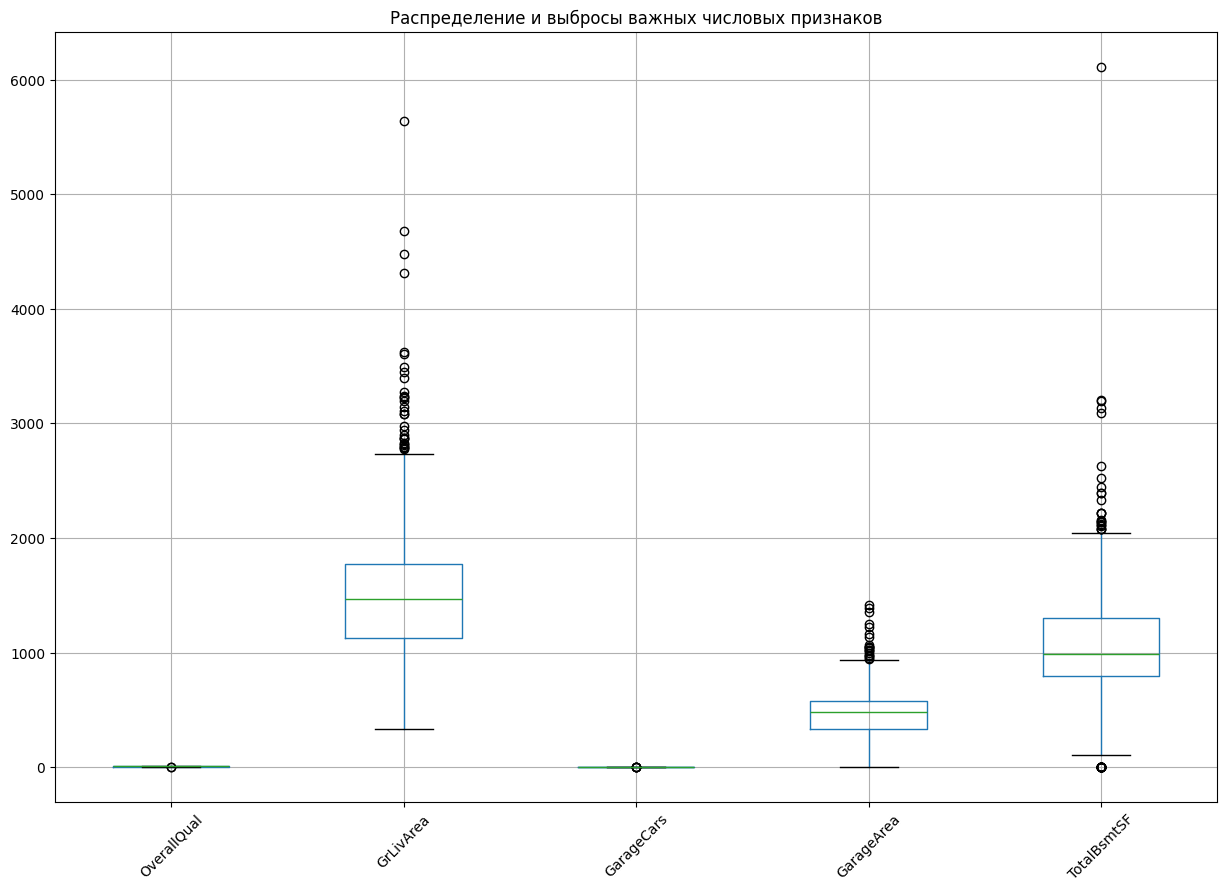

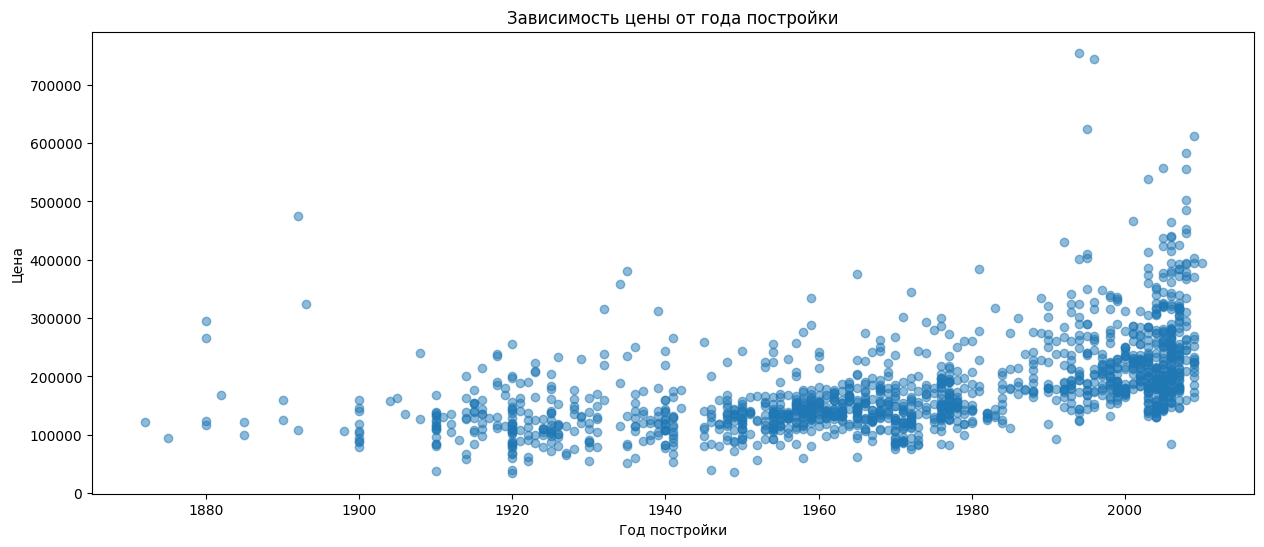

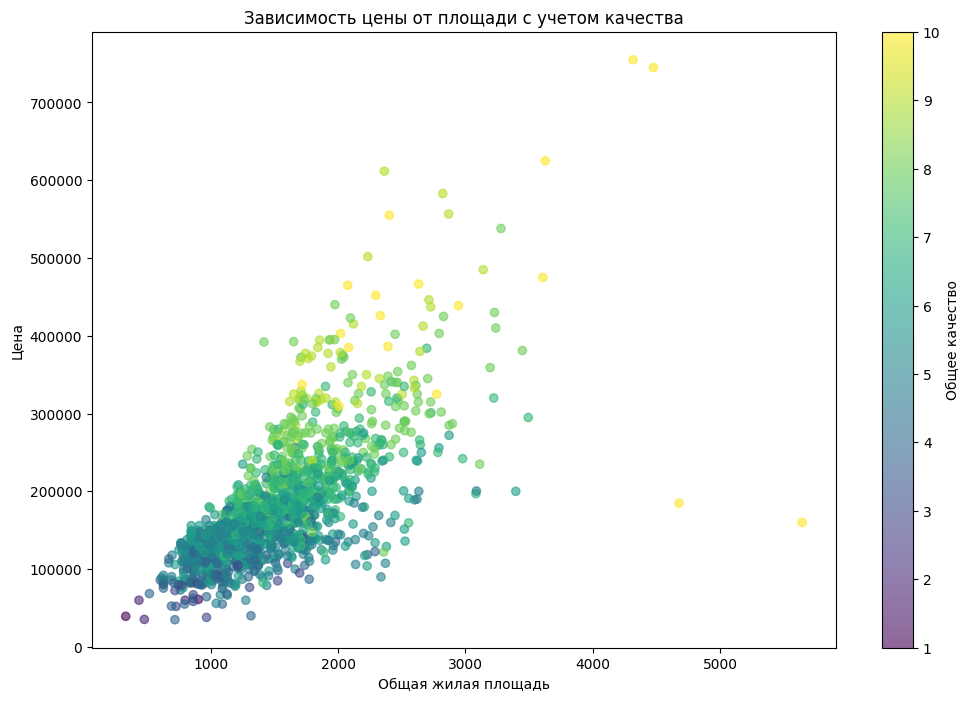


Статистические характеристики числовых признаков:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Загрузка данных
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

def comprehensive_eda(df):
    # 1. Общая информация о данных
    print("Размер датасета:", df.shape)
    print("\nТипы данных:")
    print(df.dtypes.value_counts())
    
    # 2. Анализ пропущенных значений
    plt.figure(figsize=(15, 8))
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    missing.sort_values(inplace=True, ascending=False)
    plt.bar(range(len(missing)), missing.values)
    plt.xticks(range(len(missing)), missing.index, rotation=90)
    plt.title('Количество пропущенных значений по признакам')
    plt.tight_layout()
    plt.show()

    # 3. Распределение целевой переменной
    plt.figure(figsize=(12, 6))
    plt.hist(df['SalePrice'], bins=50, density=True, alpha=0.7)
    plt.title('Распределение цен на жилье')
    plt.xlabel('Цена')
    plt.ylabel('Частота')
    plt.show()

    # Проверка на нормальность распределения
    plt.figure(figsize=(12, 6))
    stats.probplot(df['SalePrice'], plot=plt)
    plt.title('Q-Q график цен на жилье')
    plt.show()

    # 4. Корреляционный анализ числовых признаков
    numeric_df = df.select_dtypes(include=['int64', 'float64'])
    plt.figure(figsize=(20, 16))
    corr_matrix = numeric_df.corr()
    plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
    plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
    plt.title('Корреляционная матрица числовых признаков')
    plt.tight_layout()
    plt.show()

    # 5. Топ-10 наиболее коррелированных с ценой признаков
    correlations = numeric_df.corr()['SalePrice'].sort_values(ascending=False)
    top_features = correlations[1:11].index
    
    # Графики рассеяния для топ признаков
    fig, axes = plt.subplots(5, 2, figsize=(15, 25))
    axes = axes.ravel()
    
    for idx, feature in enumerate(top_features):
        axes[idx].scatter(df[feature], df['SalePrice'], alpha=0.5)
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('SalePrice')
        axes[idx].set_title(f'SalePrice vs {feature}')
    plt.tight_layout()
    plt.show()

    # 6. Анализ категориальных признаков
    categorical_features = ['MSZoning', 'Neighborhood', 'ExterQual', 
                          'KitchenQual', 'GarageType', 'SaleType']
    
    fig, axes = plt.subplots(3, 2, figsize=(20, 25))
    axes = axes.ravel()
    
    for idx, feature in enumerate(categorical_features):
        if feature in df.columns:
            df.boxplot(column='SalePrice', by=feature, ax=axes[idx])
            axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45)
            axes[idx].set_title(f'SalePrice by {feature}')
    plt.tight_layout()
    plt.show()

    # 7. Анализ выбросов для топ-5 признаков
    top_5_features = correlations[1:6].index
    plt.figure(figsize=(15, 10))
    df[top_5_features].boxplot()
    plt.xticks(rotation=45)
    plt.title('Распределение и выбросы важных числовых признаков')
    plt.show()

    # 8. Годовая динамика
    if 'YearBuilt' in df.columns:
        plt.figure(figsize=(15, 6))
        plt.scatter(df['YearBuilt'], df['SalePrice'], alpha=0.5)
        plt.xlabel('Год постройки')
        plt.ylabel('Цена')
        plt.title('Зависимость цены от года постройки')
        plt.show()

    # 9. Площадь vs Цена с учетом качества
    if all(x in df.columns for x in ['GrLivArea', 'OverallQual']):
        plt.figure(figsize=(12, 8))
        plt.scatter(df['GrLivArea'], df['SalePrice'], 
                   c=df['OverallQual'], cmap='viridis', alpha=0.6)
        plt.colorbar(label='Общее качество')
        plt.xlabel('Общая жилая площадь')
        plt.ylabel('Цена')
        plt.title('Зависимость цены от площади с учетом качества')
        plt.show()

    # Вывод статистических характеристик
    print("\nСтатистические характеристики числовых признаков:")
    print(numeric_df.describe())

    # Вывод наиболее важных корреляций
    print("\nТоп-15 признаков, наиболее коррелирующих с ценой:")
    print(correlations[:15])

# Запуск полного анализа
comprehensive_eda(train_data)


Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   in

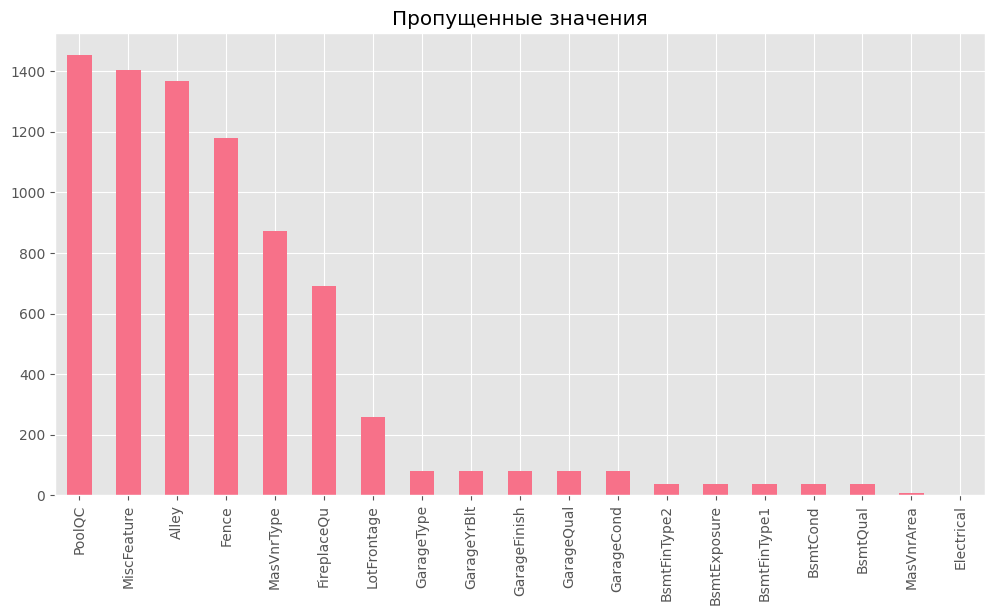

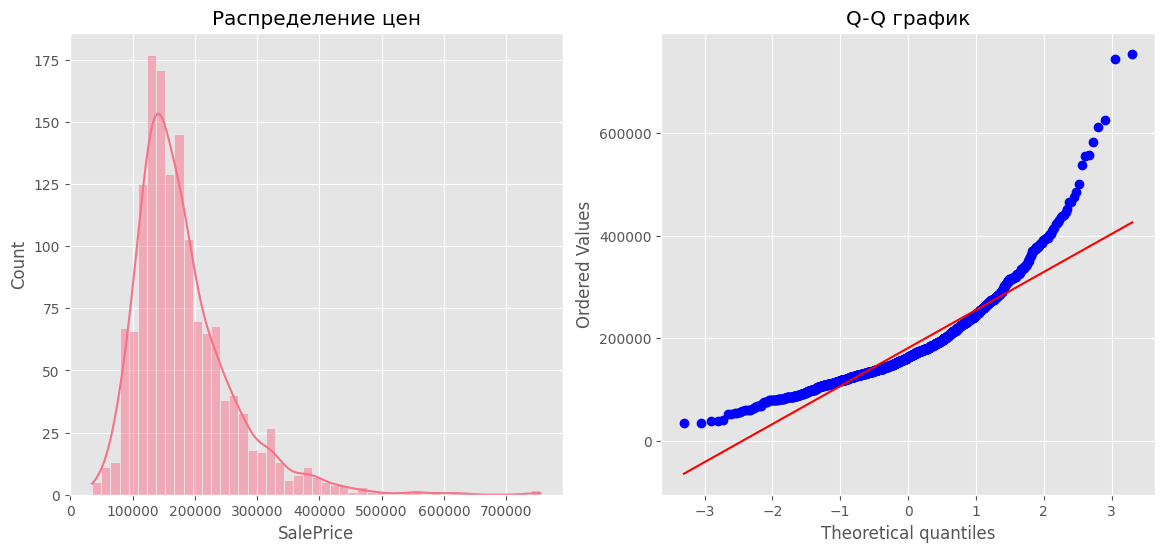

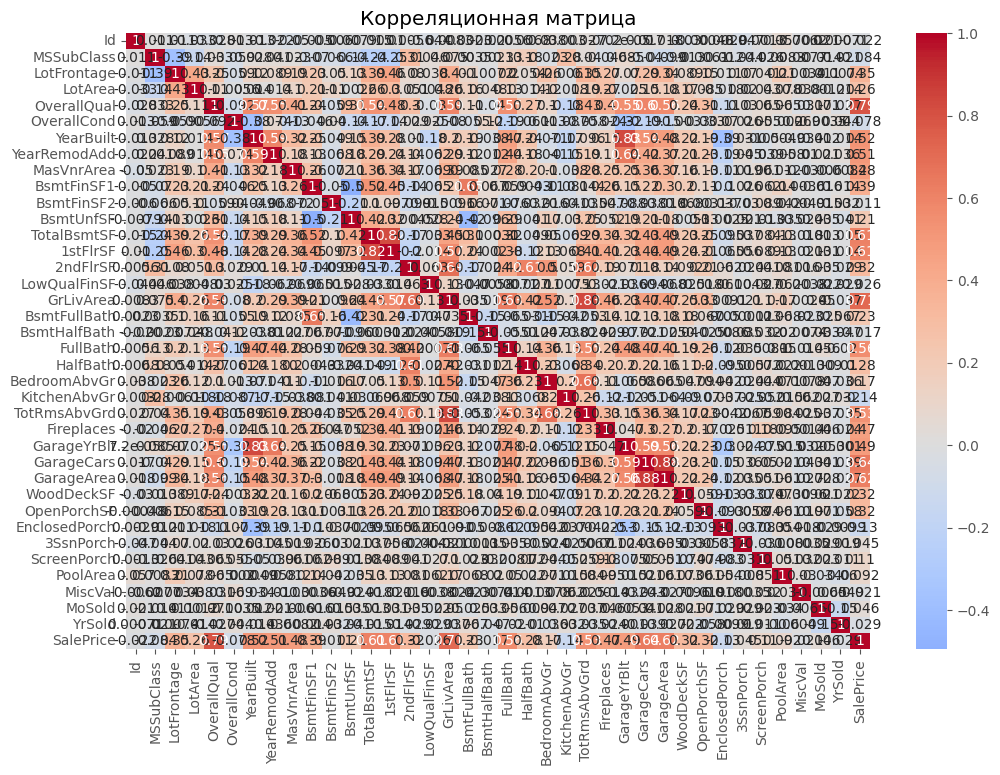

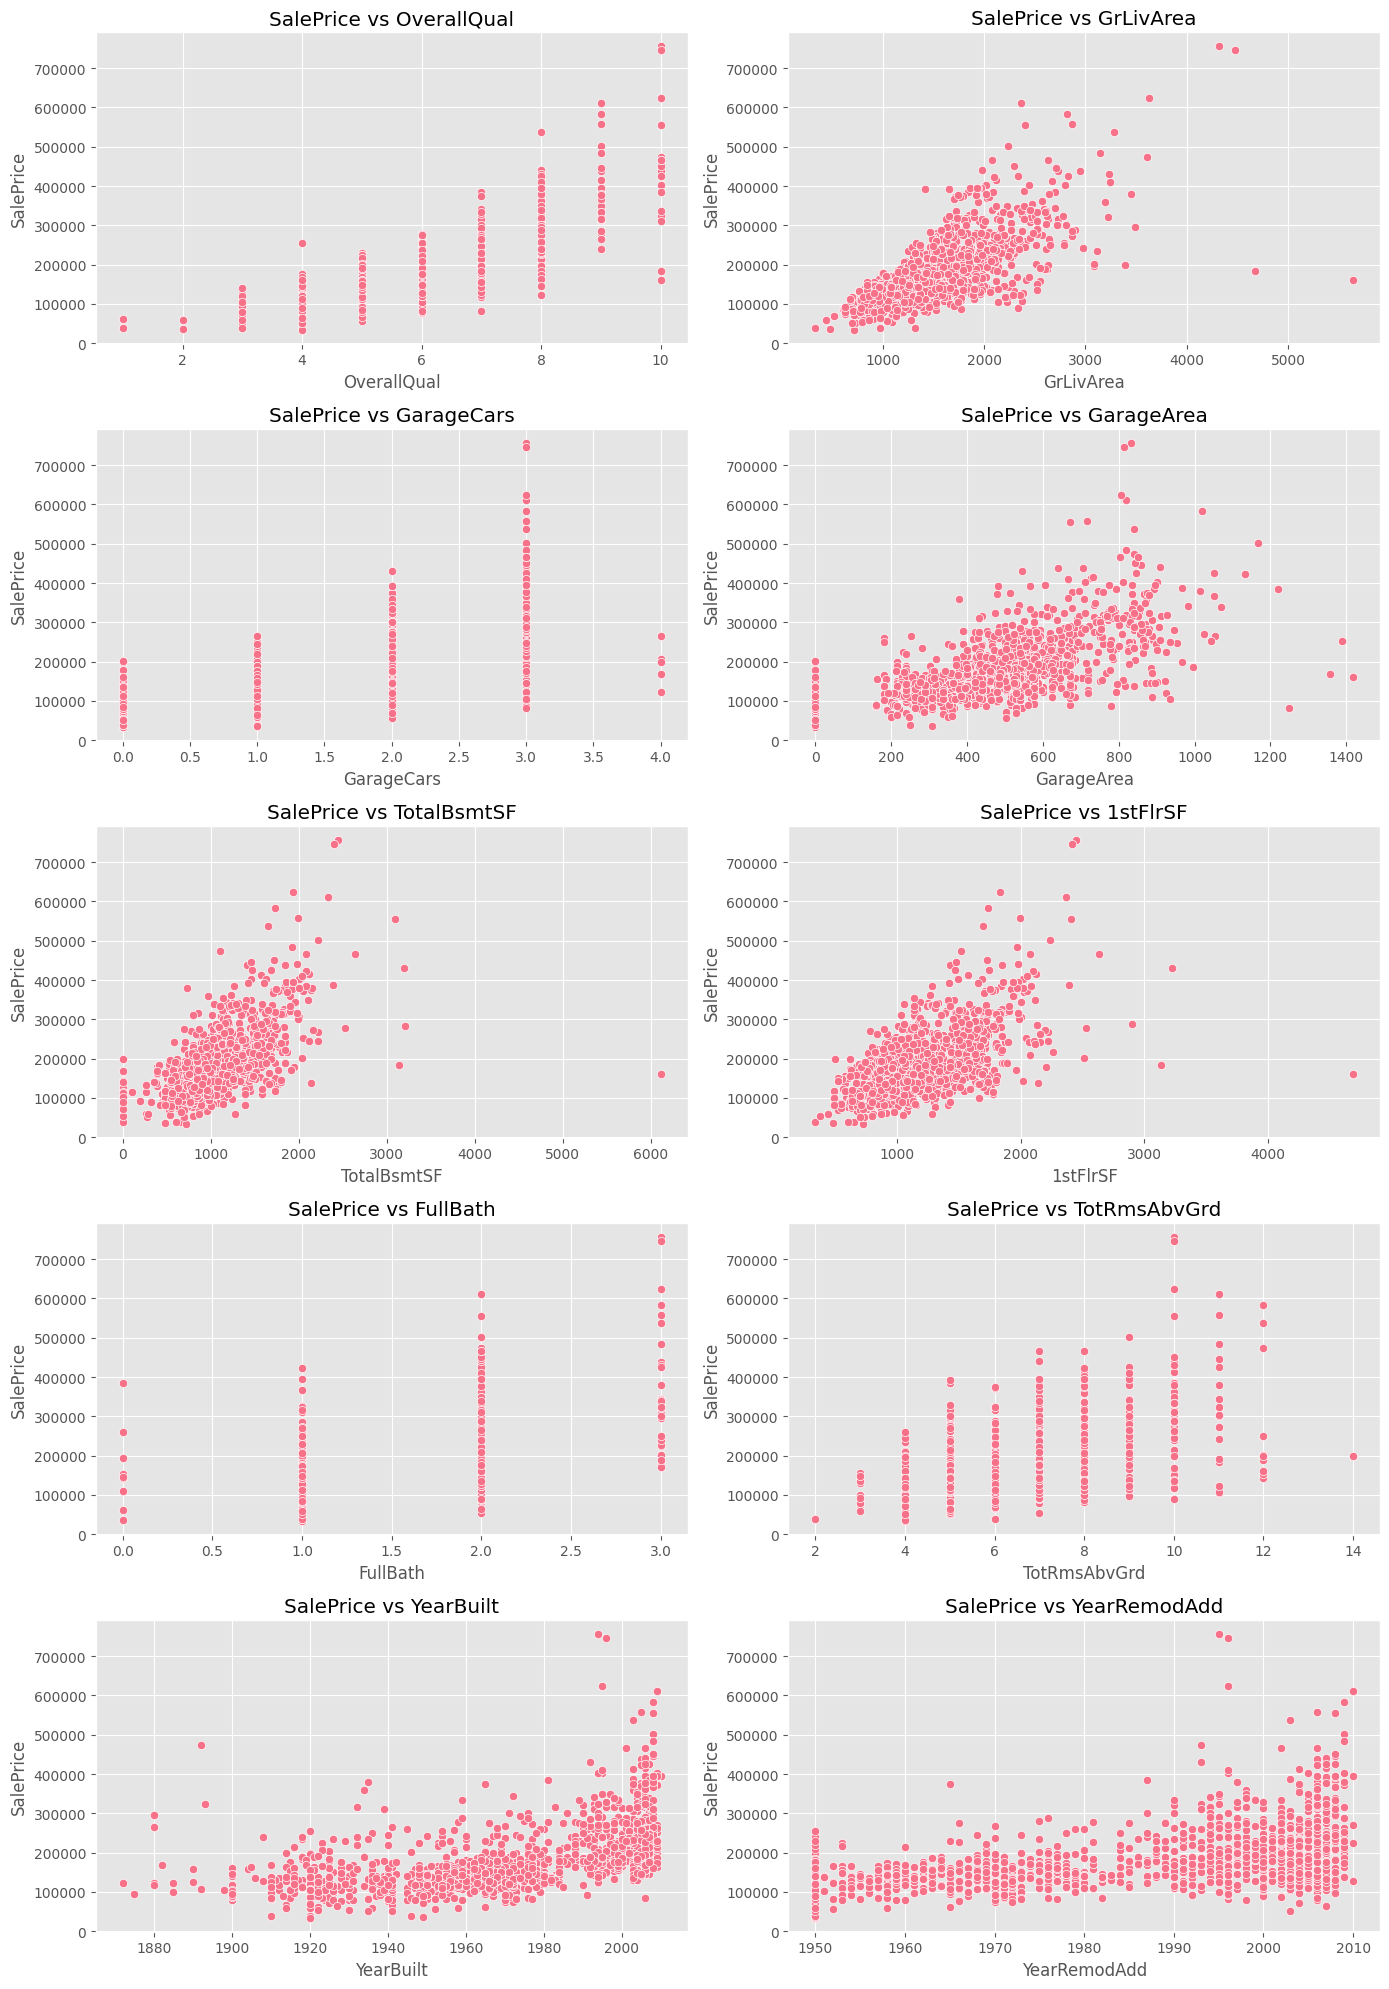

C:\Users\14488\AppData\Local\Temp\ipykernel_8772\3618239546.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx//2, idx%2].set_xticklabels(df[feature].unique(), rotation=45)
C:\Users\14488\AppData\Local\Temp\ipykernel_8772\3618239546.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx//2, idx%2].set_xticklabels(df[feature].unique(), rotation=45)
C:\Users\14488\AppData\Local\Temp\ipykernel_8772\3618239546.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx//2, idx%2].set_xticklabels(df[feature].unique(), rotation=45)
C:\Users\14488\AppData\Local\Temp\ipykernel_8772\3618239546.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
 

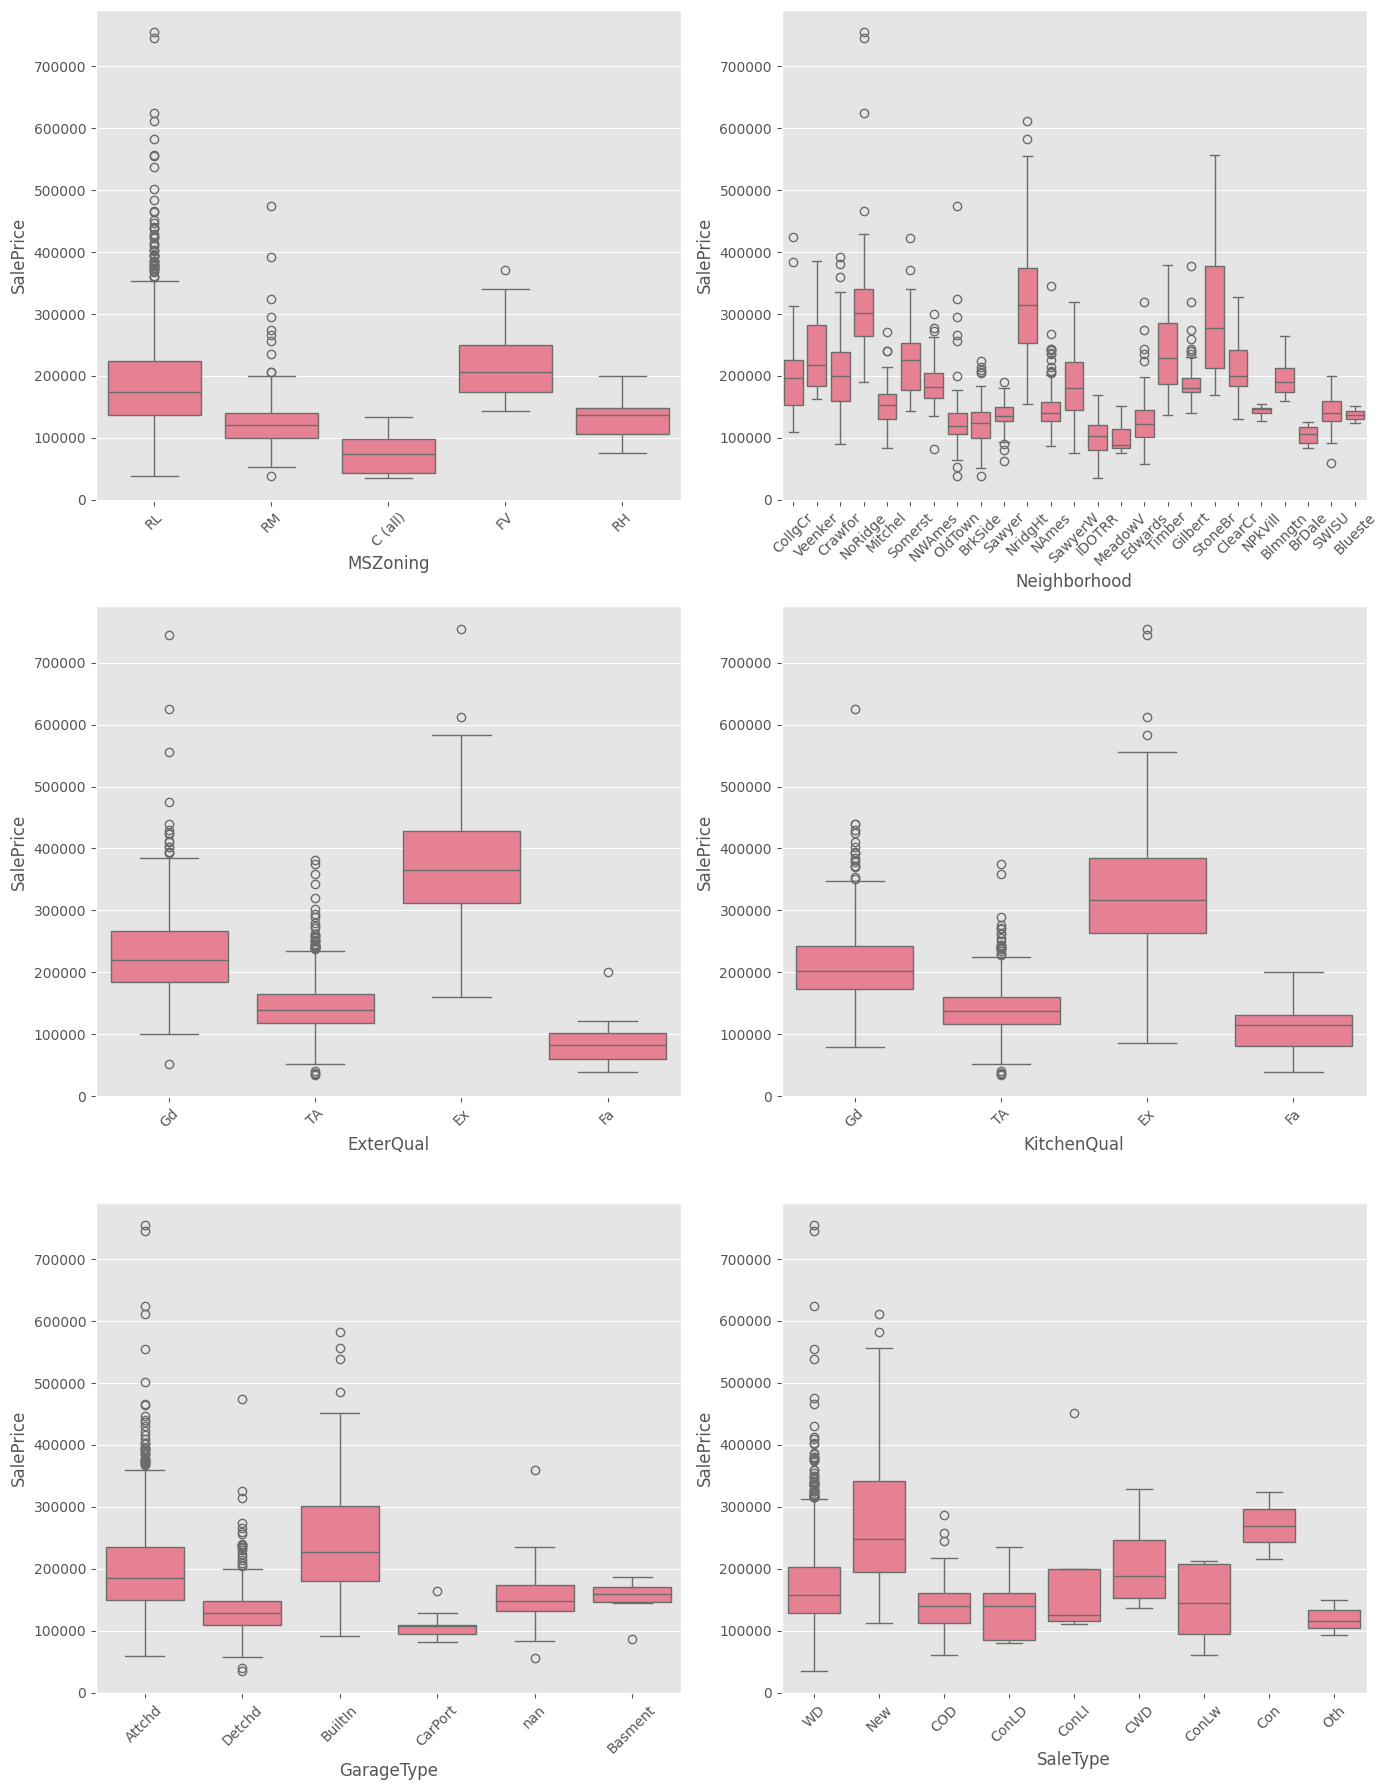

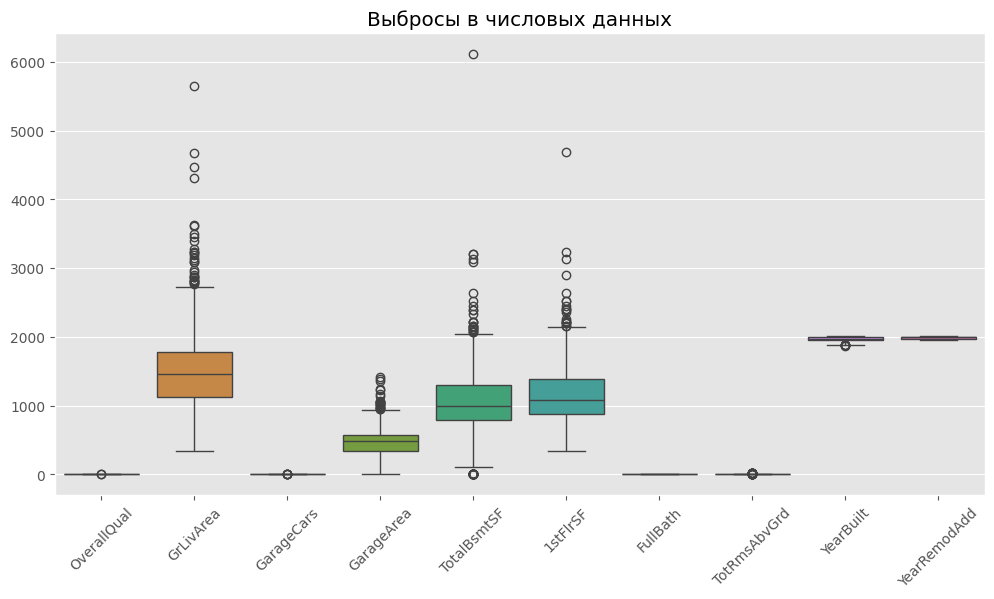

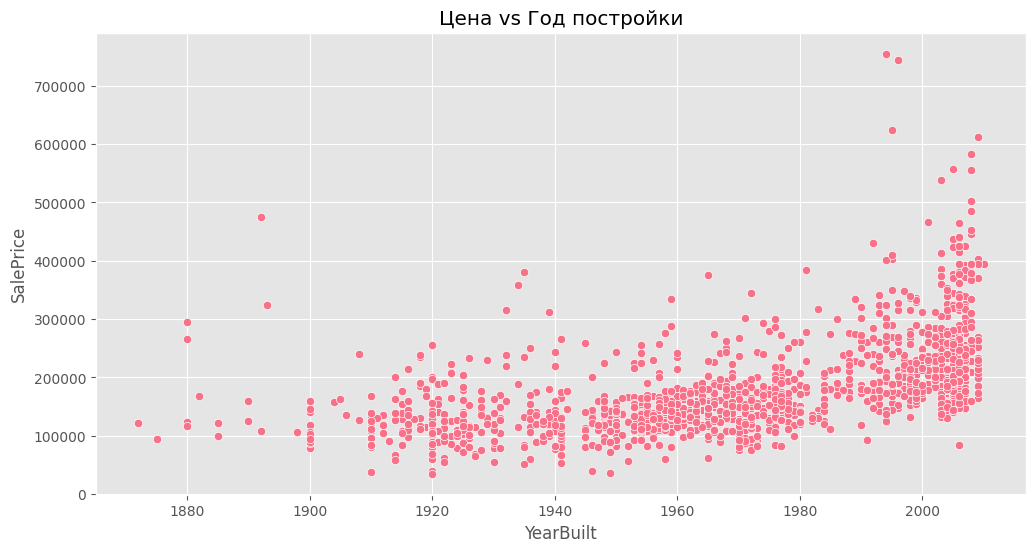

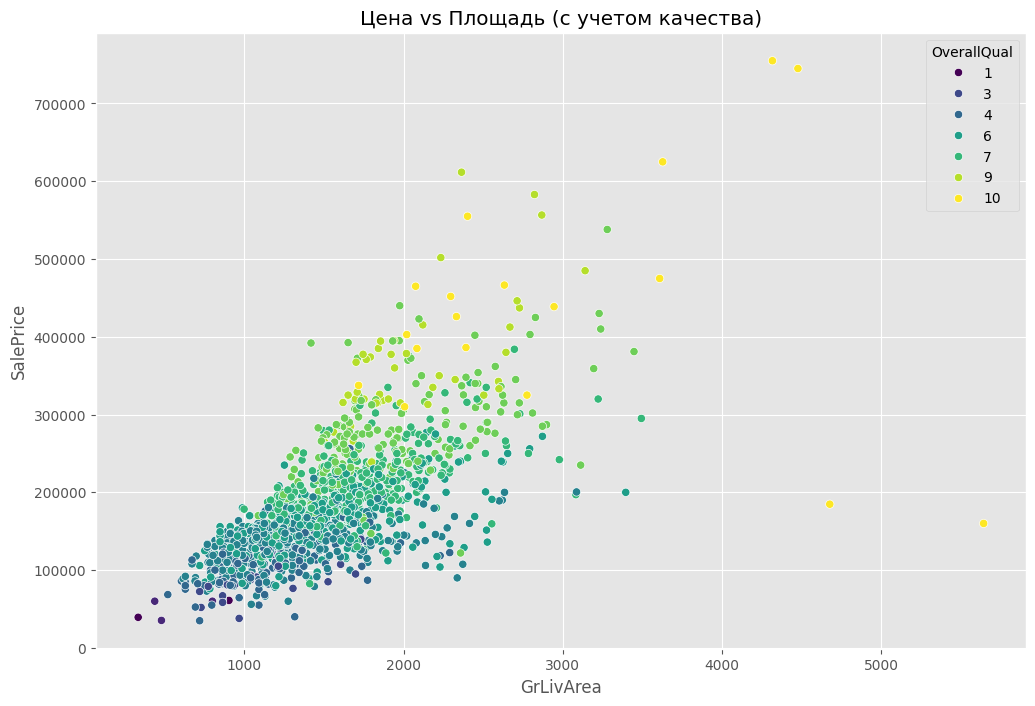


Топ-15 коррелирующих признаков:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('ggplot')  # Альтернативный стиль
sns.set_palette("husl")

# Загрузка данных
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

def comprehensive_eda(df):
    print("\nОбщая информация:")
    print(df.info())
    
    # Анализ пропущенных значений
    missing = df.isnull().sum()
    missing = missing[missing > 0].sort_values(ascending=False)
    if not missing.empty:
        missing.plot(kind='bar', figsize=(12, 6), title='Пропущенные значения')
        plt.show()
    
    # Распределение целевой переменной
    if 'SalePrice' in df.columns:
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        sns.histplot(df['SalePrice'], kde=True, ax=axes[0]).set(title='Распределение цен')
        stats.probplot(df['SalePrice'], plot=axes[1])
        axes[1].set_title('Q-Q график')
        plt.show()
        
        # Корреляция числовых признаков
        numeric_df = df.select_dtypes(include=['int64', 'float64'])
        corr = numeric_df.corr()
        top_corr = corr['SalePrice'].abs().sort_values(ascending=False)[1:11]
        
        plt.figure(figsize=(12, 8))
        sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
        plt.title('Корреляционная матрица')
        plt.show()
        
        # Графики рассеяния для топ-10 коррелирующих признаков
        fig, axes = plt.subplots(5, 2, figsize=(14, 20))
        for idx, feature in enumerate(top_corr.index):
            sns.scatterplot(x=df[feature], y=df['SalePrice'], ax=axes[idx//2, idx%2])
            axes[idx//2, idx%2].set_title(f'SalePrice vs {feature}')
        plt.tight_layout()
        plt.show()
        
        # Категориальные признаки и их влияние на цену
        cat_features = ['MSZoning', 'Neighborhood', 'ExterQual', 'KitchenQual', 'GarageType', 'SaleType']
        fig, axes = plt.subplots(3, 2, figsize=(14, 18))
        for idx, feature in enumerate(cat_features):
            if feature in df.columns:
                sns.boxplot(x=df[feature], y=df['SalePrice'], ax=axes[idx//2, idx%2])
                axes[idx//2, idx%2].set_xticklabels(df[feature].unique(), rotation=45)
        plt.tight_layout()
        plt.show()
        
        # Анализ выбросов
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df[top_corr.index])
        plt.xticks(rotation=45)
        plt.title('Выбросы в числовых данных')
        plt.show()
        
        # Год постройки vs Цена
        if 'YearBuilt' in df.columns:
            plt.figure(figsize=(12, 6))
            sns.scatterplot(x=df['YearBuilt'], y=df['SalePrice'])
            plt.title('Цена vs Год постройки')
            plt.show()
        
        # Площадь vs Цена с учетом качества
        if {'GrLivArea', 'OverallQual'}.issubset(df.columns):
            plt.figure(figsize=(12, 8))
            sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'], hue=df['OverallQual'], palette='viridis')
            plt.title('Цена vs Площадь (с учетом качества)')
            plt.show()
        
        print("\nТоп-15 коррелирующих признаков:")
        print(top_corr[:15])

# Запуск анализа
comprehensive_eda(train_data)




Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   in

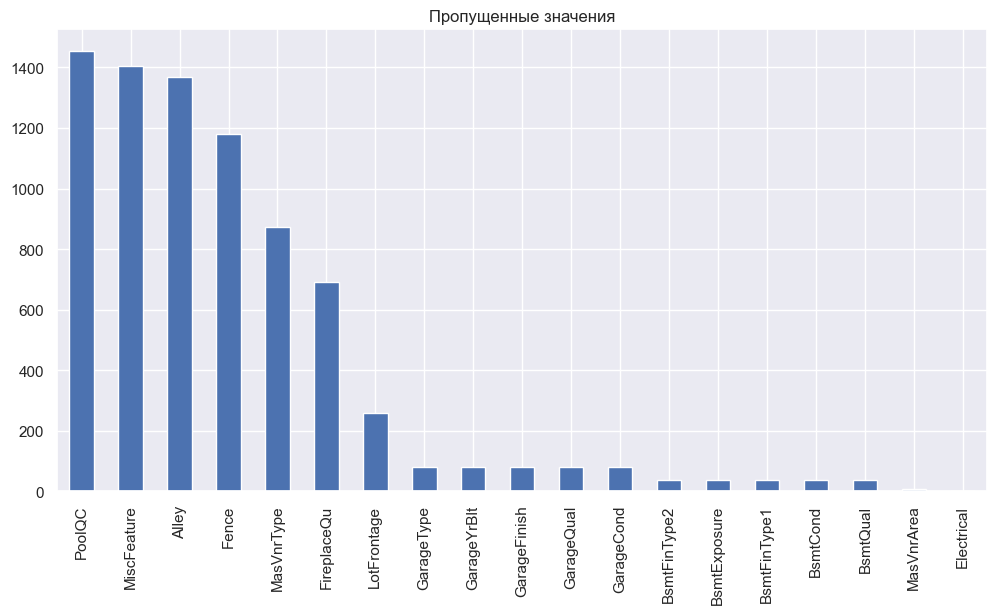


Количество дубликатов: 0


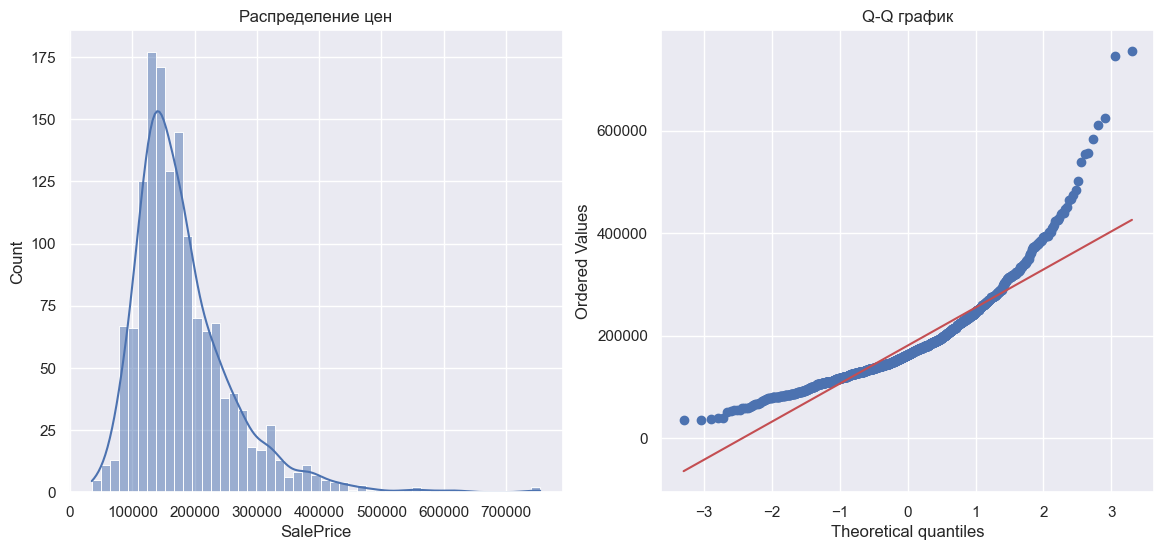

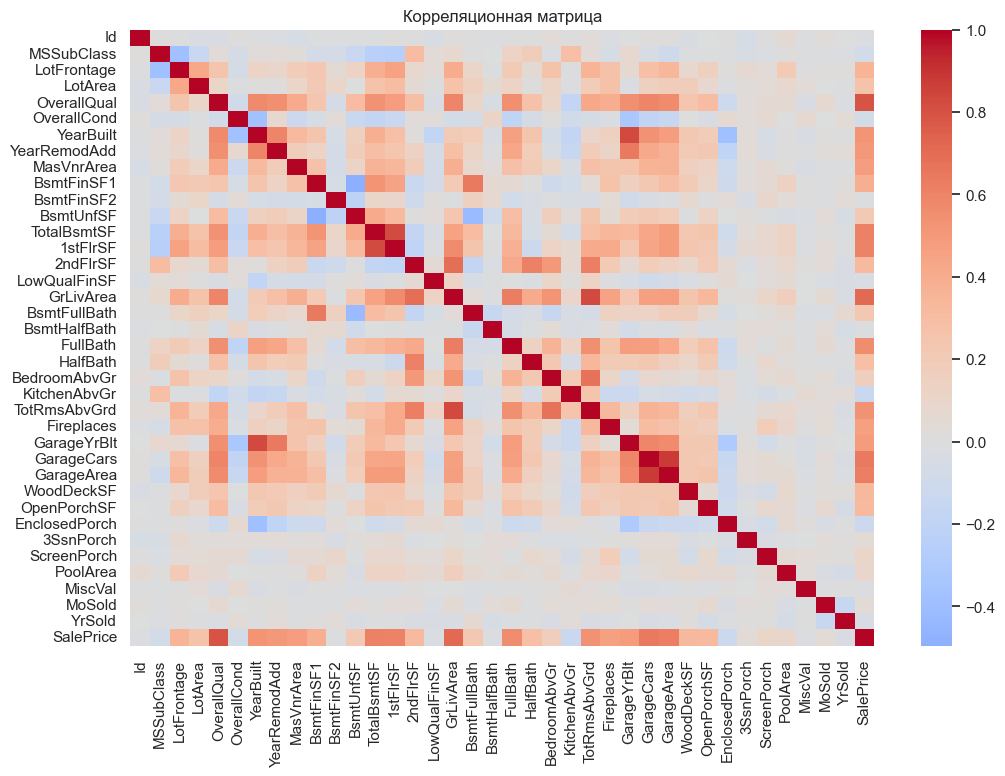

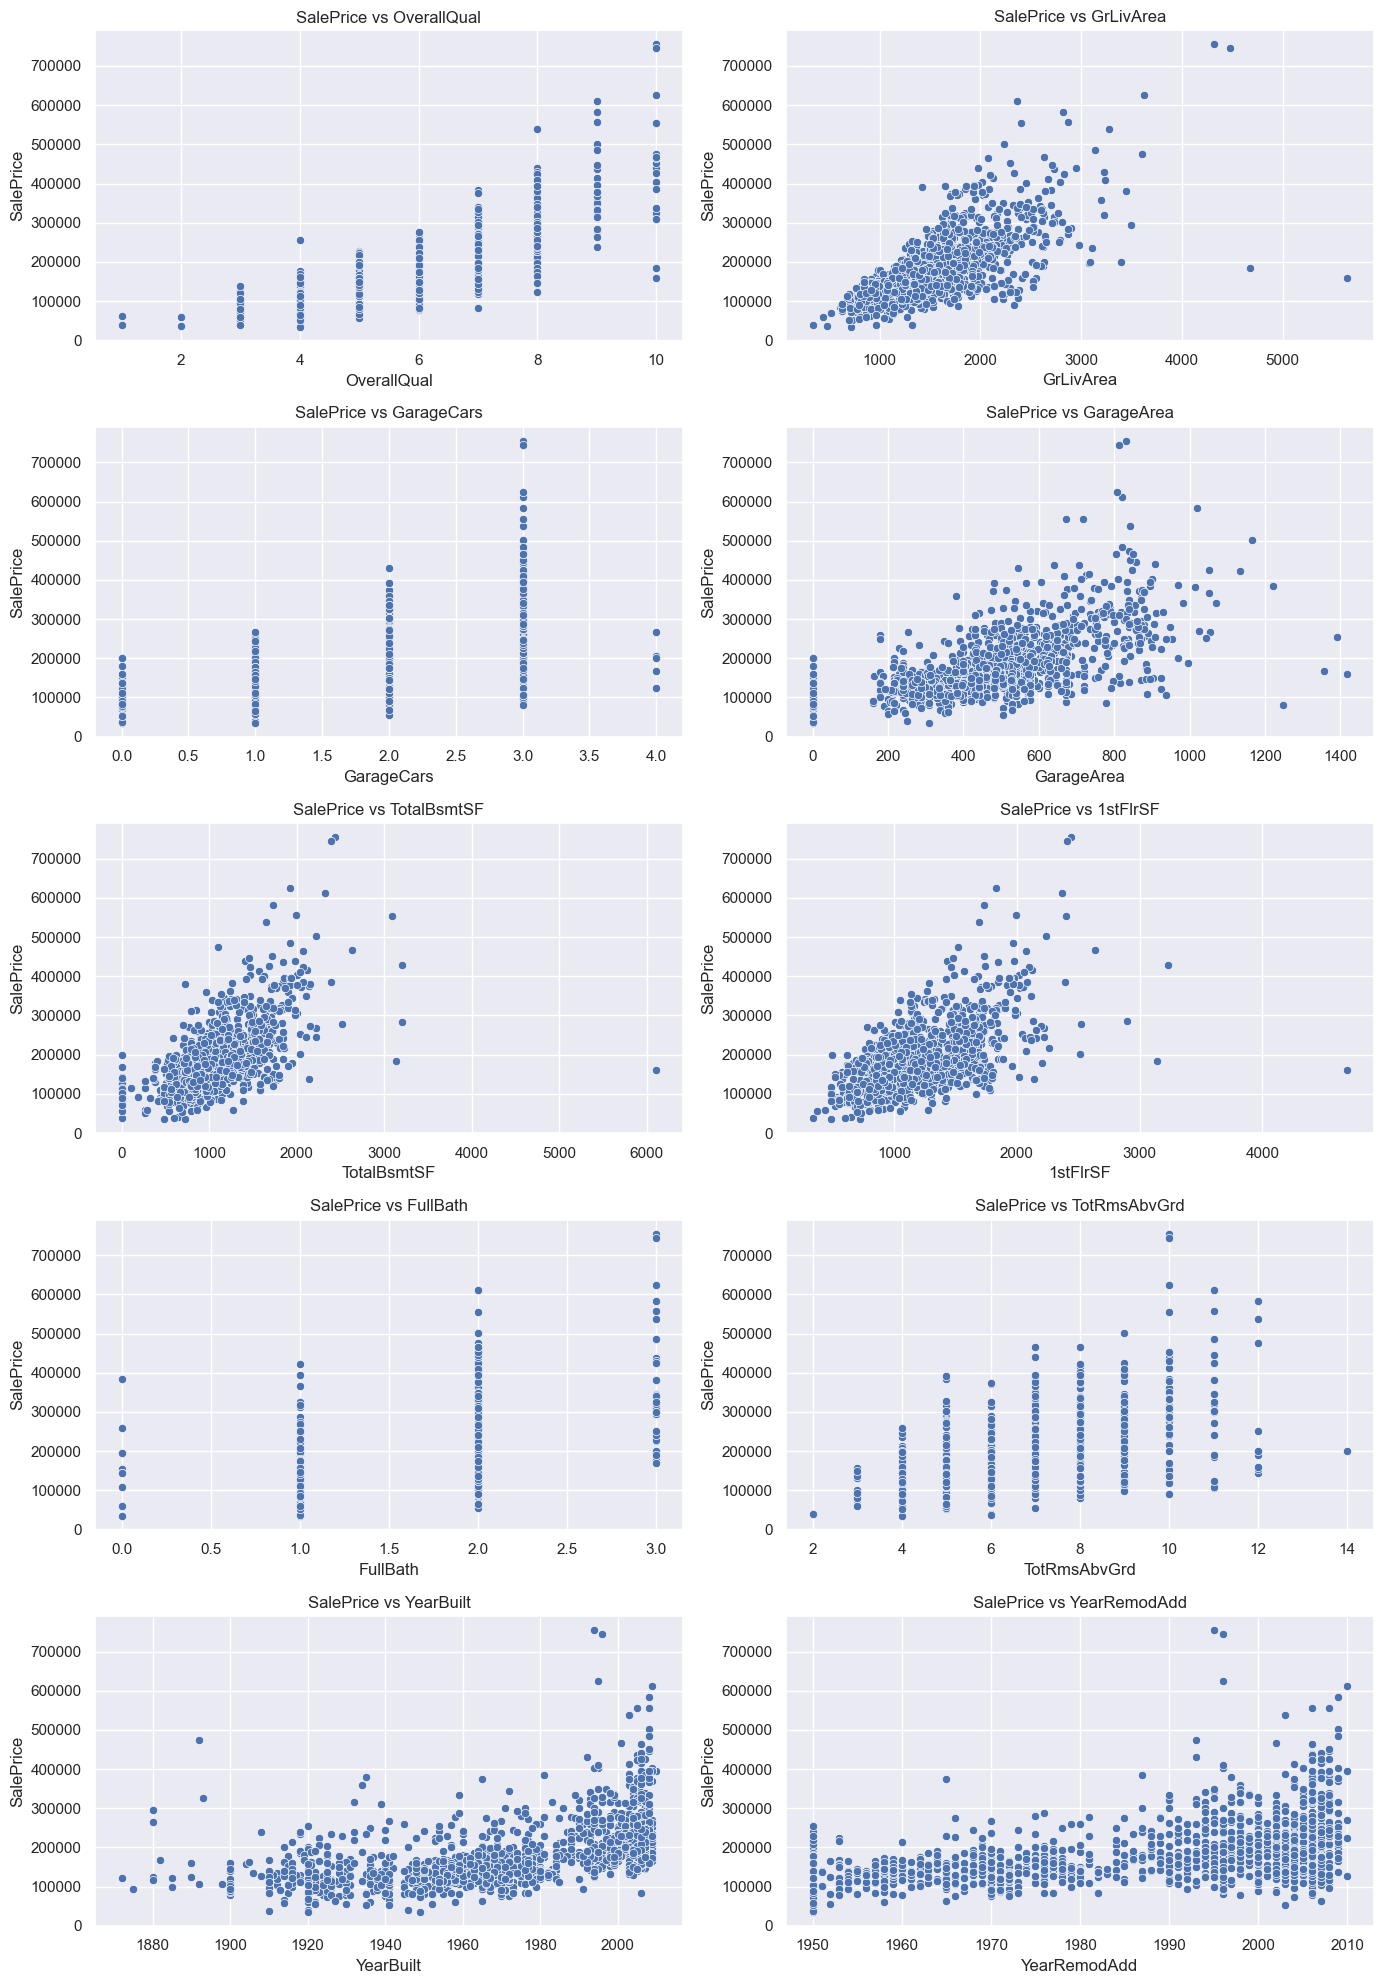

C:\Users\14488\AppData\Local\Temp\ipykernel_8772\962885727.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx//2, idx%2].set_xticklabels(df[feature].unique(), rotation=45)
C:\Users\14488\AppData\Local\Temp\ipykernel_8772\962885727.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx//2, idx%2].set_xticklabels(df[feature].unique(), rotation=45)
C:\Users\14488\AppData\Local\Temp\ipykernel_8772\962885727.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx//2, idx%2].set_xticklabels(df[feature].unique(), rotation=45)
C:\Users\14488\AppData\Local\Temp\ipykernel_8772\962885727.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axe

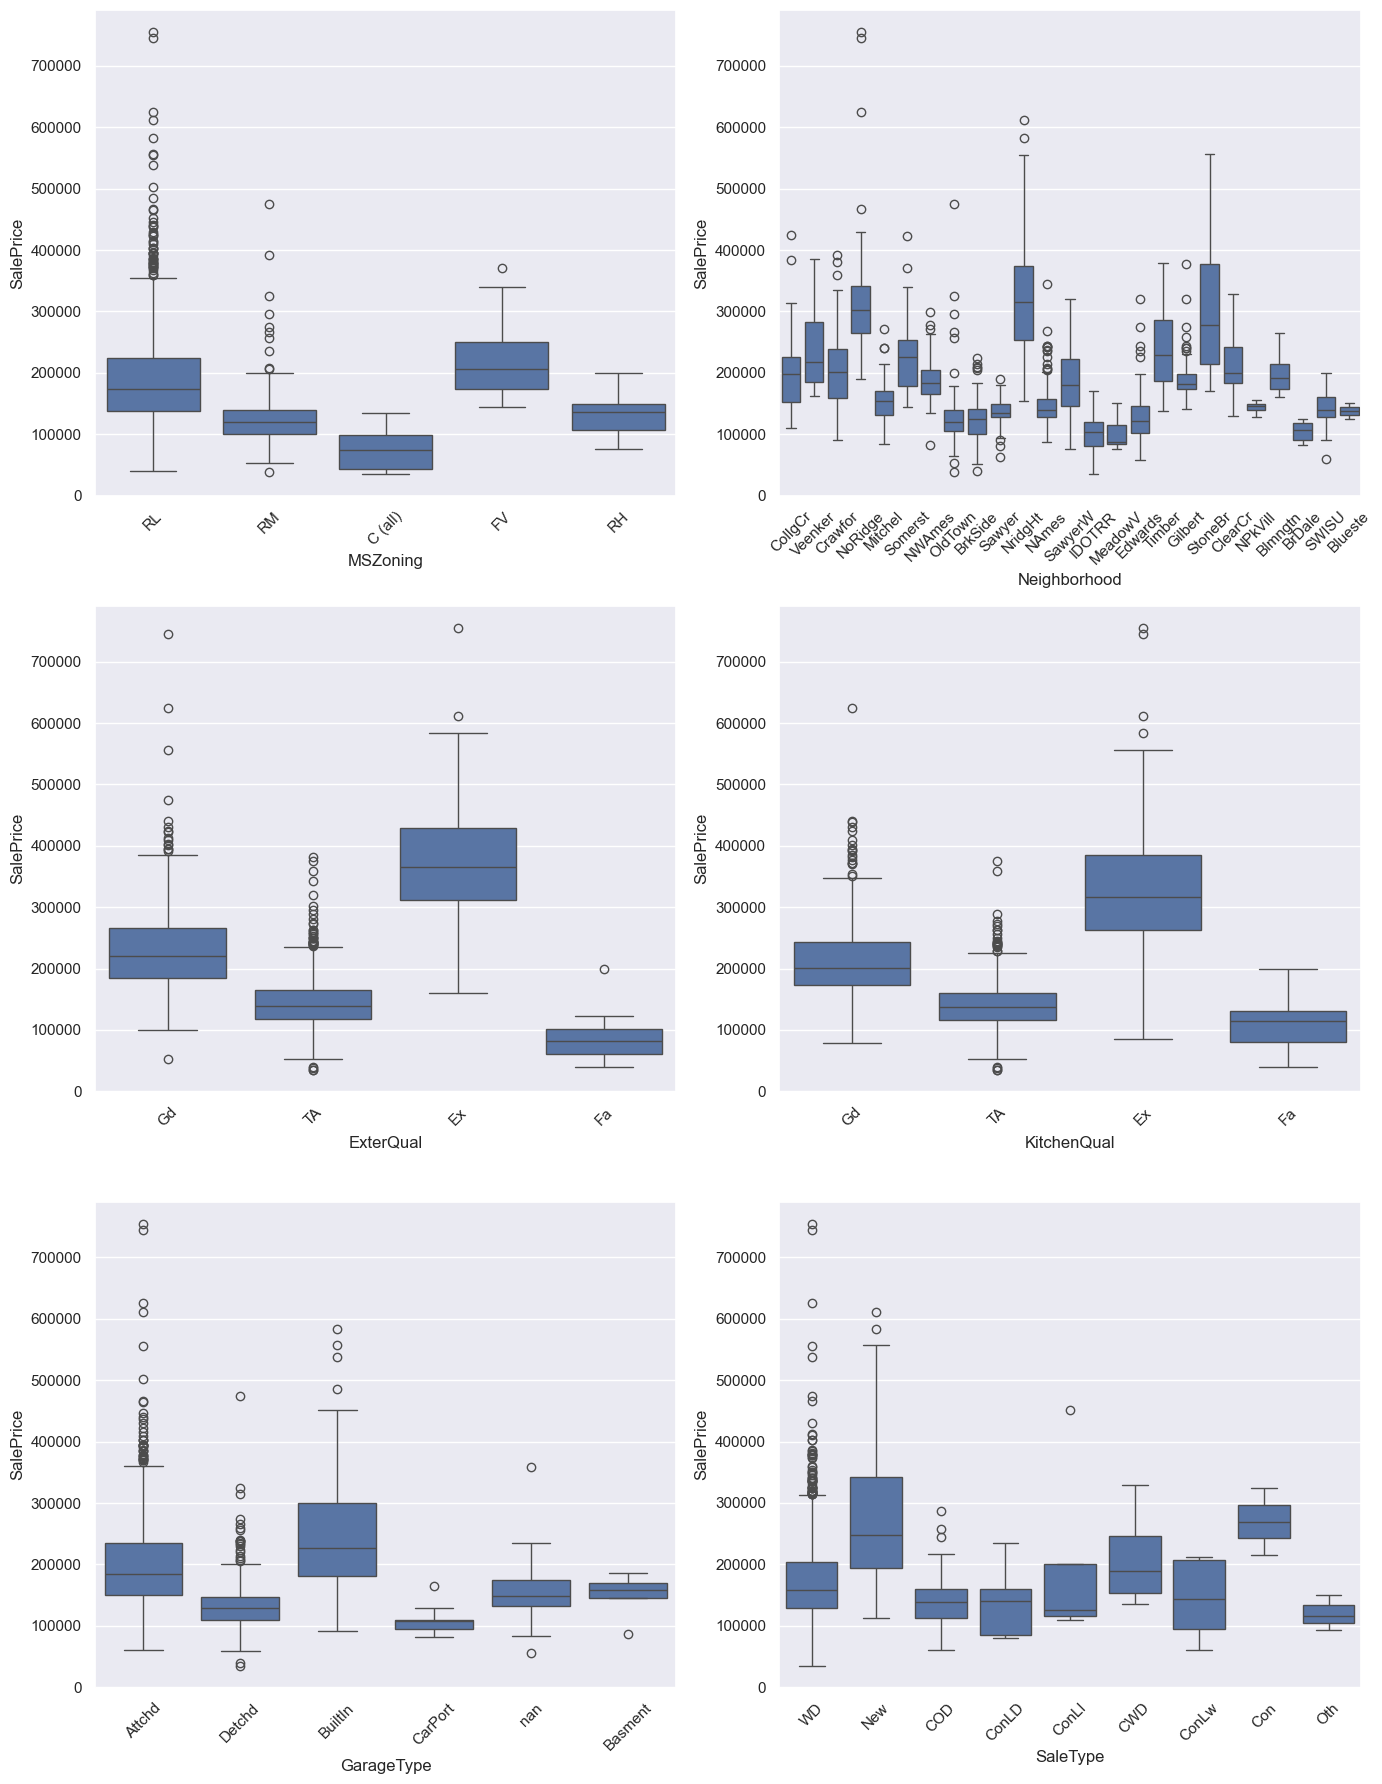

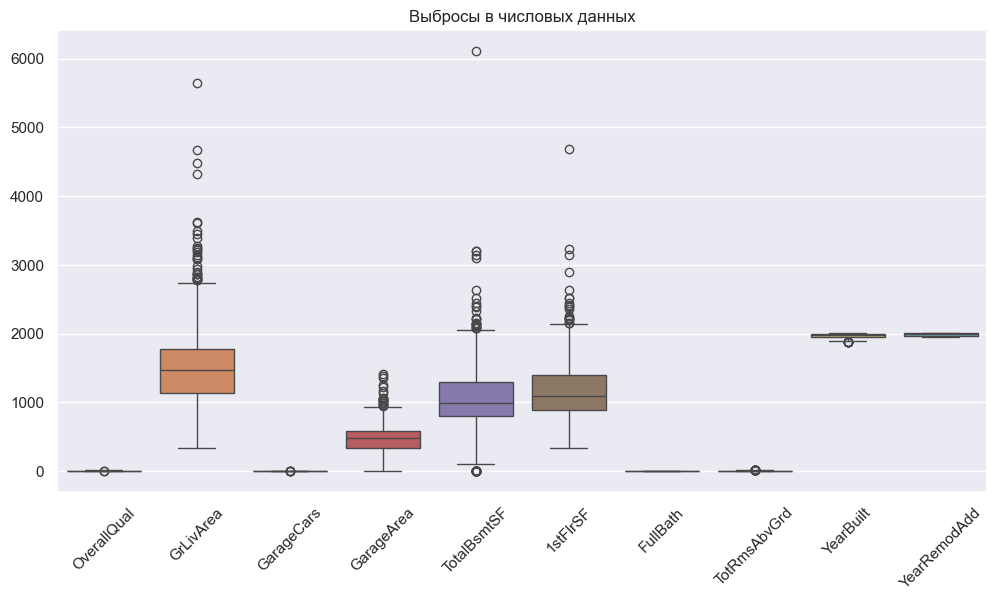

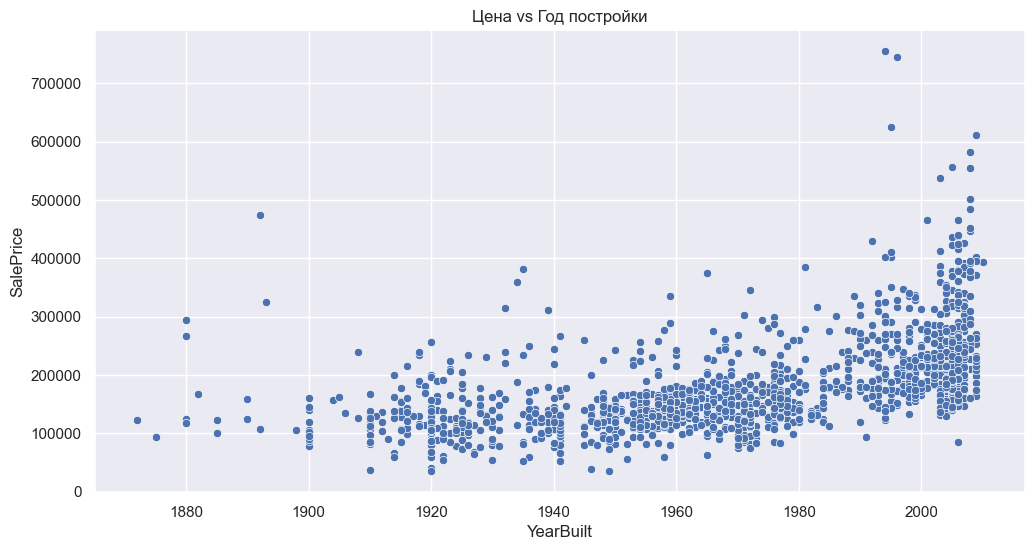

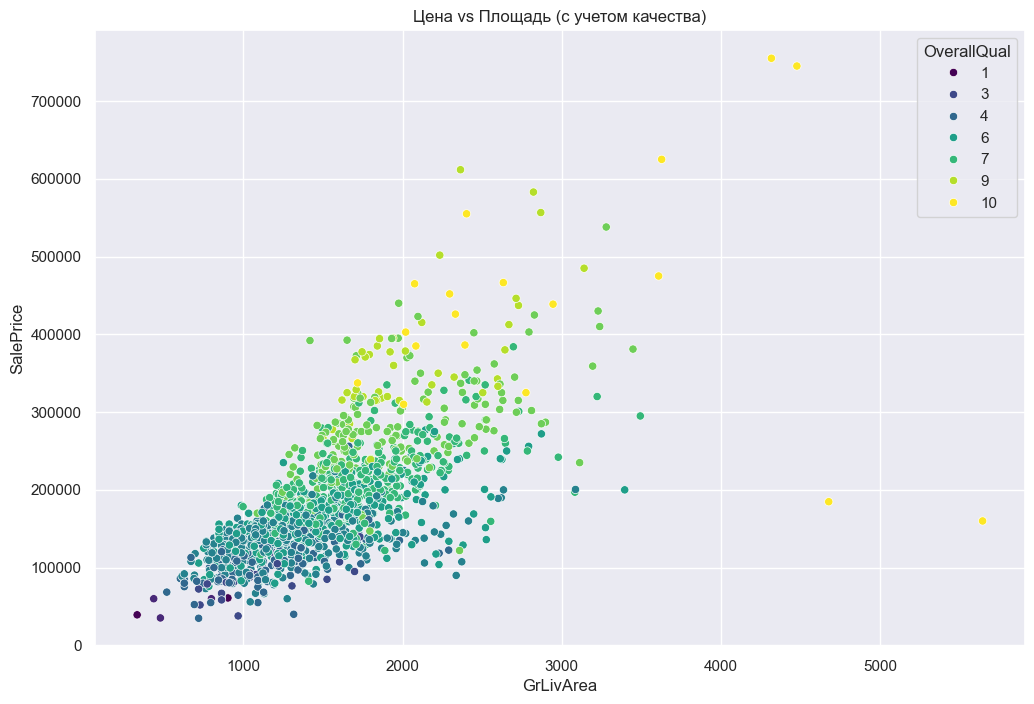

<Figure size 1200x800 with 0 Axes>

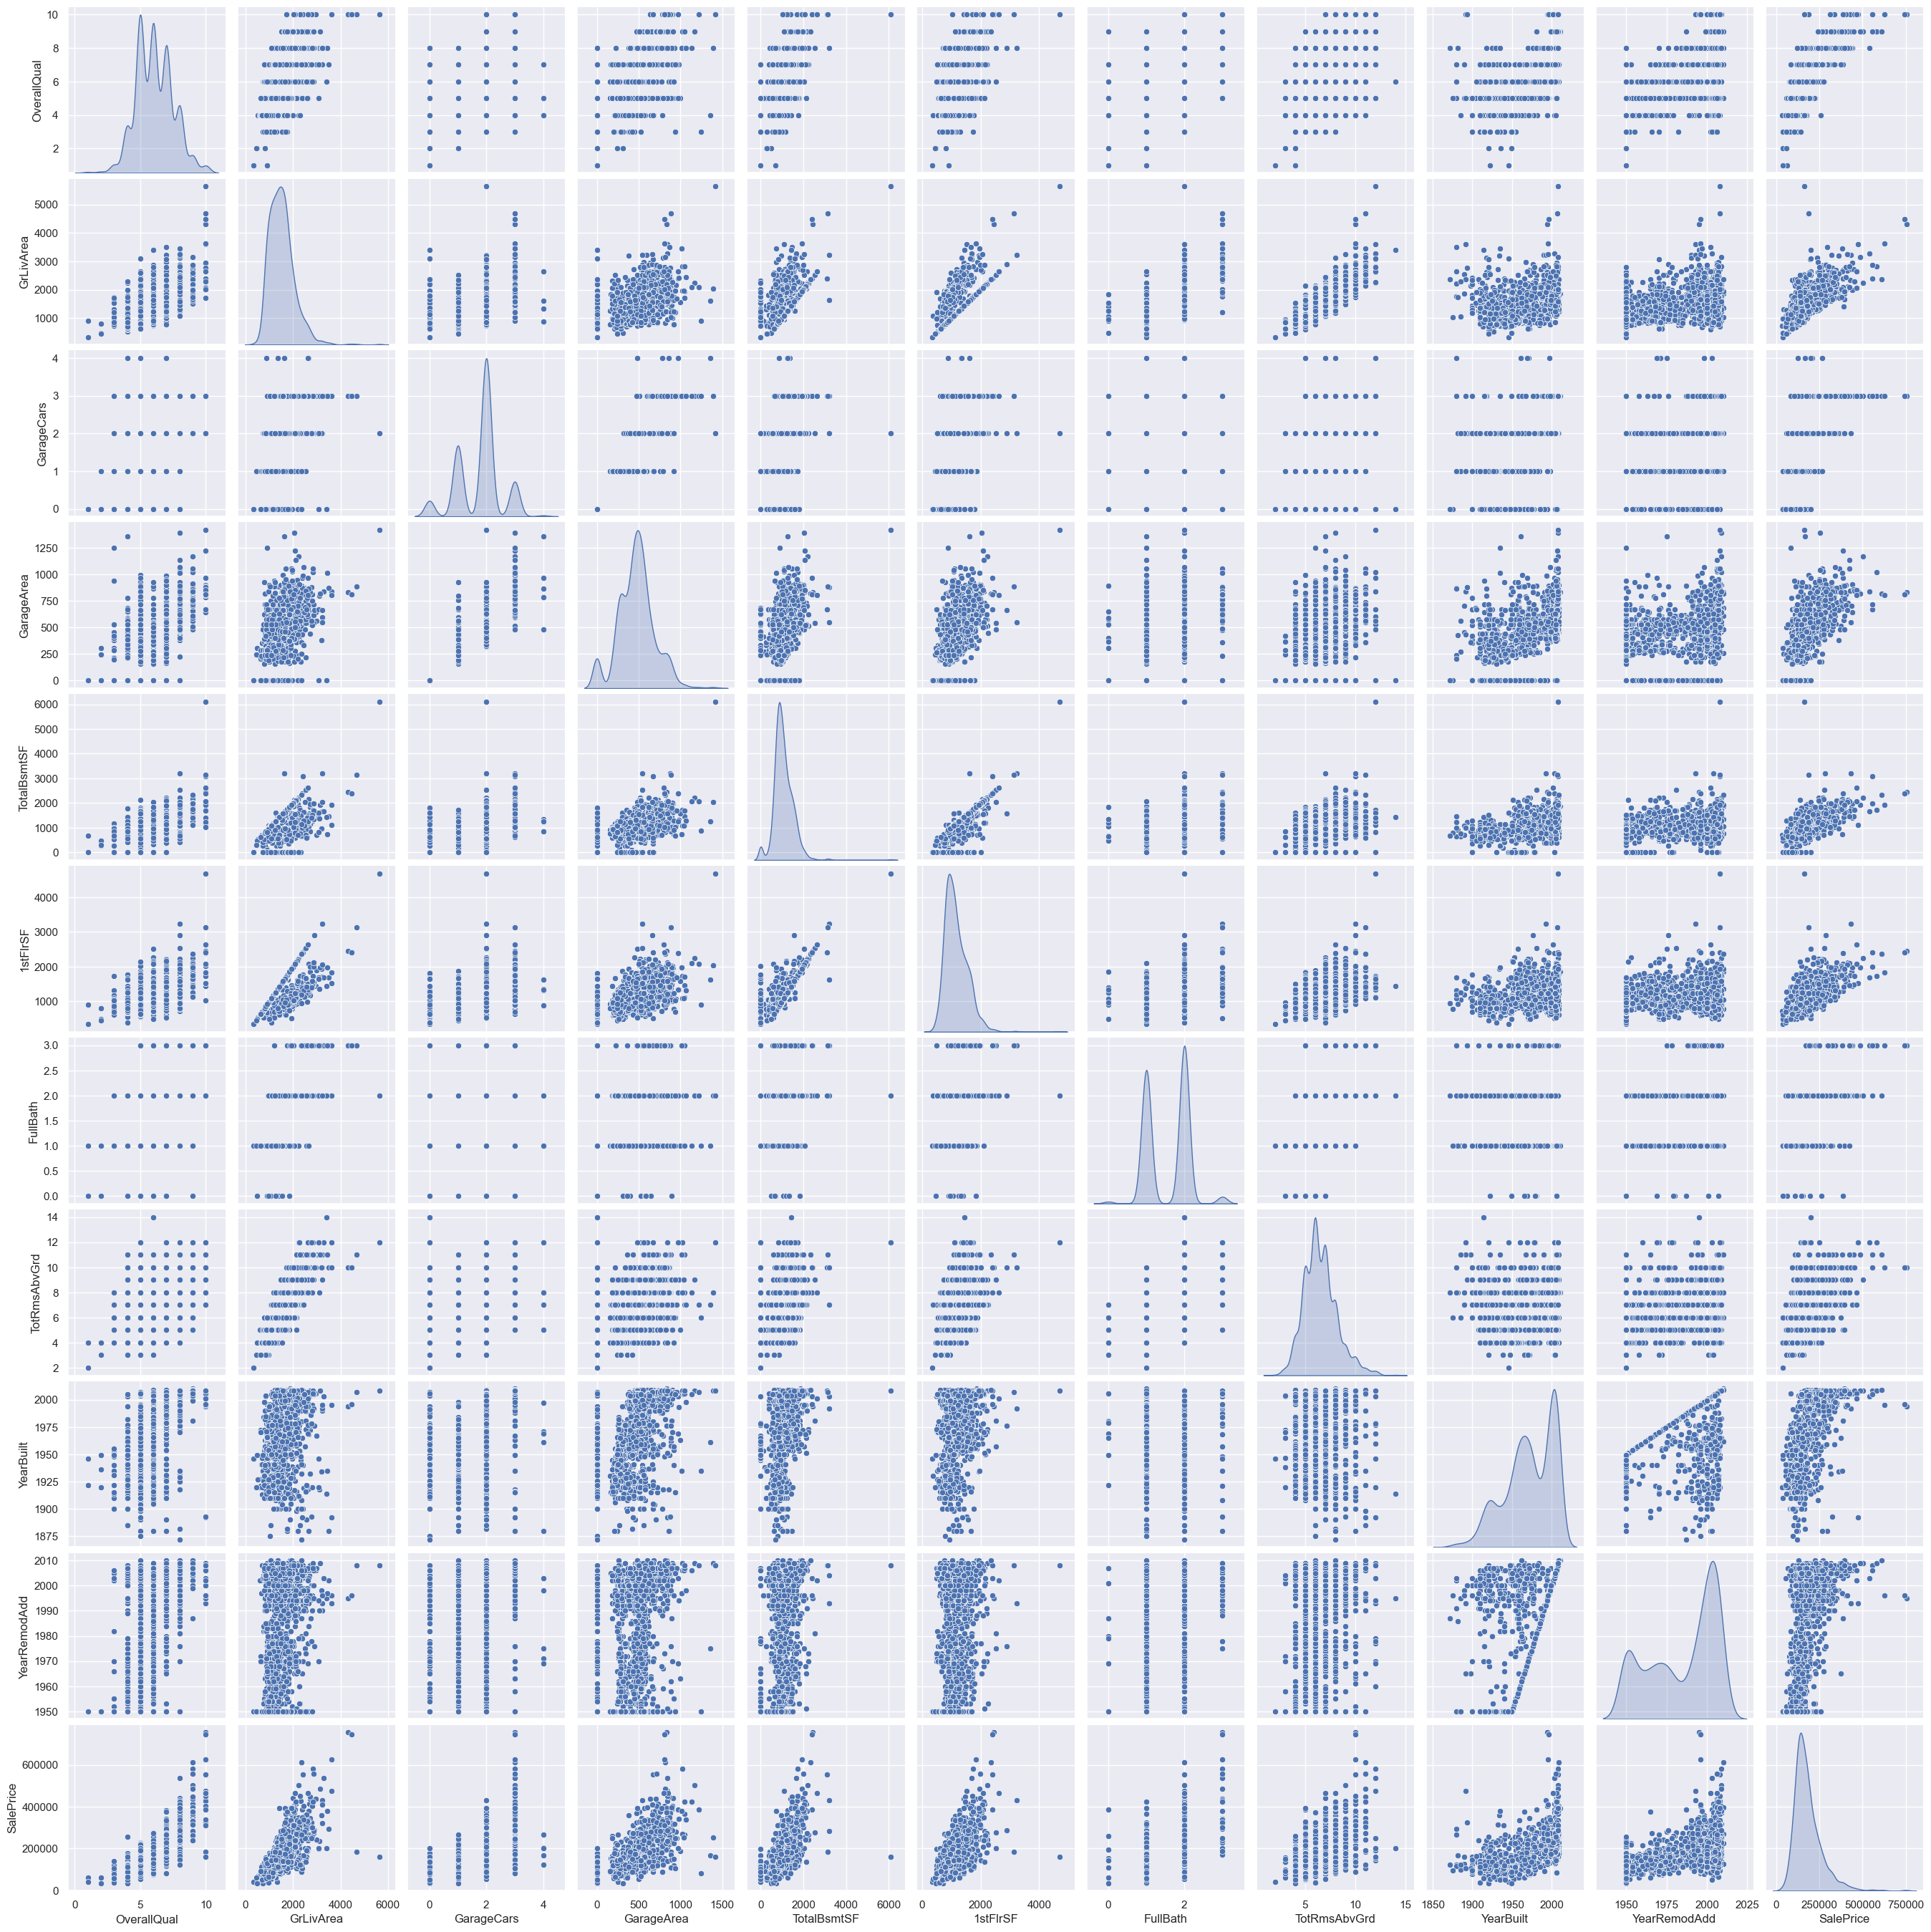

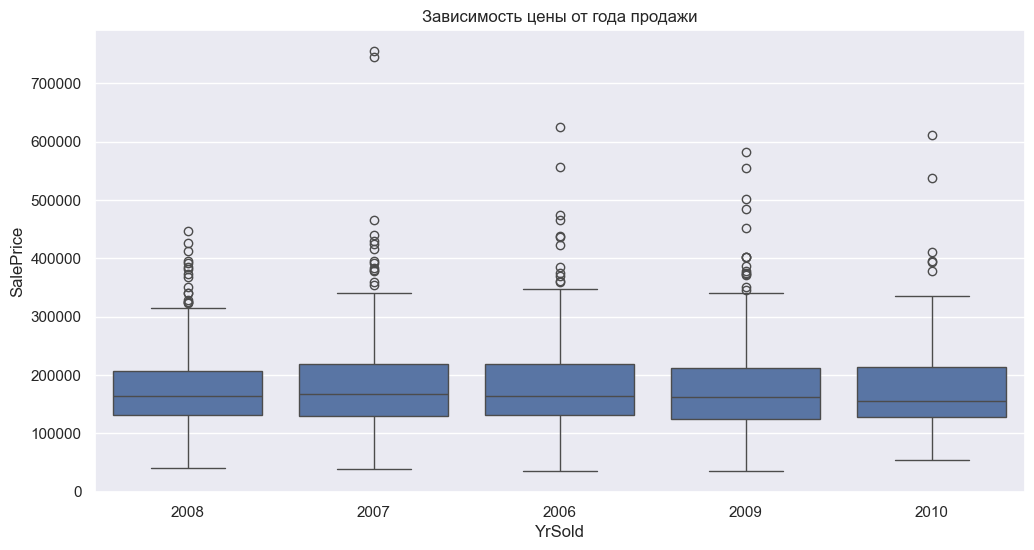


Топ-15 коррелирующих признаков:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('ggplot')
sns.set_theme()

# Загрузка данных
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

def comprehensive_eda(df):
    print("\nОбщая информация:")
    print(df.info())
    
    # Анализ пропущенных значений
    missing = df.isnull().sum()
    missing = missing[missing > 0].sort_values(ascending=False)
    if not missing.empty:
        missing.plot(kind='bar', figsize=(12, 6), title='Пропущенные значения')
        plt.show()
    
    # Анализ дубликатов
    duplicate_count = df.duplicated().sum()
    print(f"\nКоличество дубликатов: {duplicate_count}")
    
    # Распределение целевой переменной
    if 'SalePrice' in df.columns:
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        sns.histplot(df['SalePrice'], kde=True, ax=axes[0]).set(title='Распределение цен')
        stats.probplot(df['SalePrice'], plot=axes[1])
        axes[1].set_title('Q-Q график')
        plt.show()
        
        # Корреляция числовых признаков
        numeric_df = df.select_dtypes(include=['int64', 'float64'])
        corr = numeric_df.corr()
        top_corr = corr['SalePrice'].abs().sort_values(ascending=False)[1:11]
        
        plt.figure(figsize=(12, 8))
        sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
        plt.title('Корреляционная матрица')
        plt.show()
        
        # Графики рассеяния для топ-10 коррелирующих признаков
        fig, axes = plt.subplots(5, 2, figsize=(14, 20))
        for idx, feature in enumerate(top_corr.index):
            sns.scatterplot(x=df[feature], y=df['SalePrice'], ax=axes[idx//2, idx%2])
            axes[idx//2, idx%2].set_title(f'SalePrice vs {feature}')
        plt.tight_layout()
        plt.show()
        
        # Категориальные признаки и их влияние на цену
        cat_features = ['MSZoning', 'Neighborhood', 'ExterQual', 'KitchenQual', 'GarageType', 'SaleType']
        fig, axes = plt.subplots(3, 2, figsize=(14, 18))
        for idx, feature in enumerate(cat_features):
            if feature in df.columns:
                sns.boxplot(x=df[feature], y=df['SalePrice'], ax=axes[idx//2, idx%2])
                axes[idx//2, idx%2].set_xticklabels(df[feature].unique(), rotation=45)
        plt.tight_layout()
        plt.show()
        
        # Анализ выбросов
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df[top_corr.index])
        plt.xticks(rotation=45)
        plt.title('Выбросы в числовых данных')
        plt.show()
        
        # Год постройки vs Цена
        if 'YearBuilt' in df.columns:
            plt.figure(figsize=(12, 6))
            sns.scatterplot(x=df['YearBuilt'], y=df['SalePrice'])
            plt.title('Цена vs Год постройки')
            plt.show()
        
        # Площадь vs Цена с учетом качества
        if {'GrLivArea', 'OverallQual'}.issubset(df.columns):
            plt.figure(figsize=(12, 8))
            sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'], hue=df['OverallQual'], palette='viridis')
            plt.title('Цена vs Площадь (с учетом качества)')
            plt.show()
        
        # Анализ корреляций с другими переменными
        plt.figure(figsize=(12, 8))
        sns.pairplot(df[list(top_corr.index) + ['SalePrice']], diag_kind='kde')
        plt.show()
        
        # Анализ сезонности
        if 'YrSold' in df.columns:
            plt.figure(figsize=(12, 6))
            sns.boxplot(x=df['YrSold'].astype(str), y=df['SalePrice'])
            plt.title('Зависимость цены от года продажи')
            plt.show()
        
        print("\nТоп-15 коррелирующих признаков:")
        print(top_corr[:15])

# Запуск анализа
comprehensive_eda(train_data)
